# Background / Latar Belakang

AWS merupakan perusahaan Ecommerce International yang berfokus pada penjualan Sales dan Marketing Software untuk B2B. Perusahaan ini sedang melakukan riset dari banyaknya produk yang mereka jual, produk mana yang harus mereka optimalkan. Optimalisasi keuntungan sangat diperlukan perusahan mengingat banyaknya perusahaan technology yang berjatuhan dikarenakan krisi ekonomi global dan adanya Tech Winter

# Problem Statement

Perusahaan ingin mengetahui produk yang harus mereka fokuskan, di daerah mana harus dijual dan kepada siapa mereka harus menjualnya
agar perusahaan dapat mengoptimalkan keuntungan dan mengurangi kerugian serta lebih efisien 


# Goal / Tujuan

Informasi ini akan membantu perusahaan untuk meningkatkan penjualan dan juga profit 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Data Understanding

## Data Overall

In [2]:
# Melihat keseluruhan data

df = pd.read_csv('SaaS-Sales.csv')
display(df.head())
display(df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Penjelasan kolom kolom:
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

## Data Types

In [3]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Dari semua variabel tersebut ada satu variabel yang tipe data nya masih salah, yaitu year seharusnya berupa datetime year

terdapat 2 variable yang tipe data nya salah, yaitu order id dan order date yang seharusnya berupa datetime

## Missing Values

In [4]:
df.isna().sum().sort_values(ascending = False)

Row ID          0
Customer ID     0
Discount        0
Quantity        0
Sales           0
License         0
Product         0
Segment         0
Industry        0
Customer        0
Order ID        0
Subregion       0
Region          0
City            0
Country         0
Contact Name    0
Date Key        0
Order Date      0
Profit          0
dtype: int64

<Axes: >

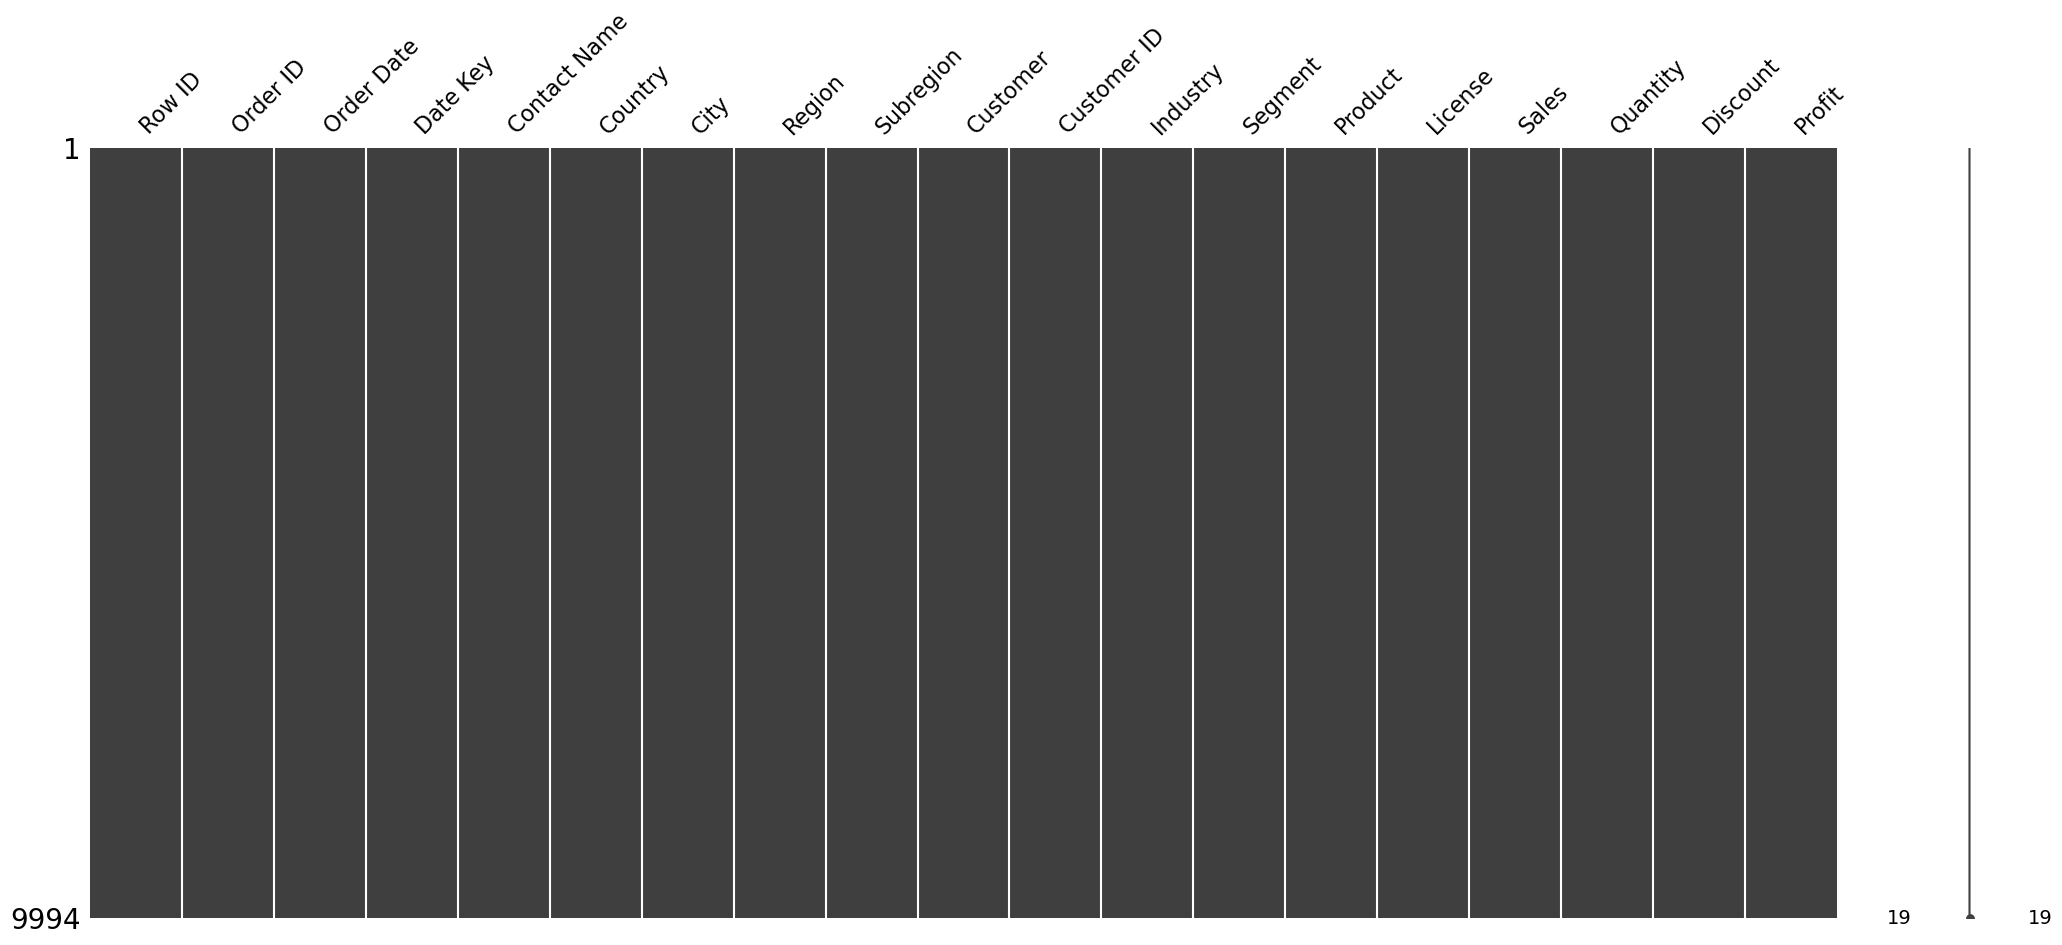

In [5]:
import missingno
missingno.matrix(df)

Pada Data diatas, terlihat tidak memiliki missing values

## Numerik

In [6]:
numerik = df.select_dtypes(include='number')

### Statistika Deskriptif

In [7]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


Dari data tersebut terlihat bahwa mean dan median kebanyakan variabel adalah berdekatan dan sama, walaupun begitu pada variabel sales dan profit menunjukan angka yang lumayan jauh

### Distribusi Data

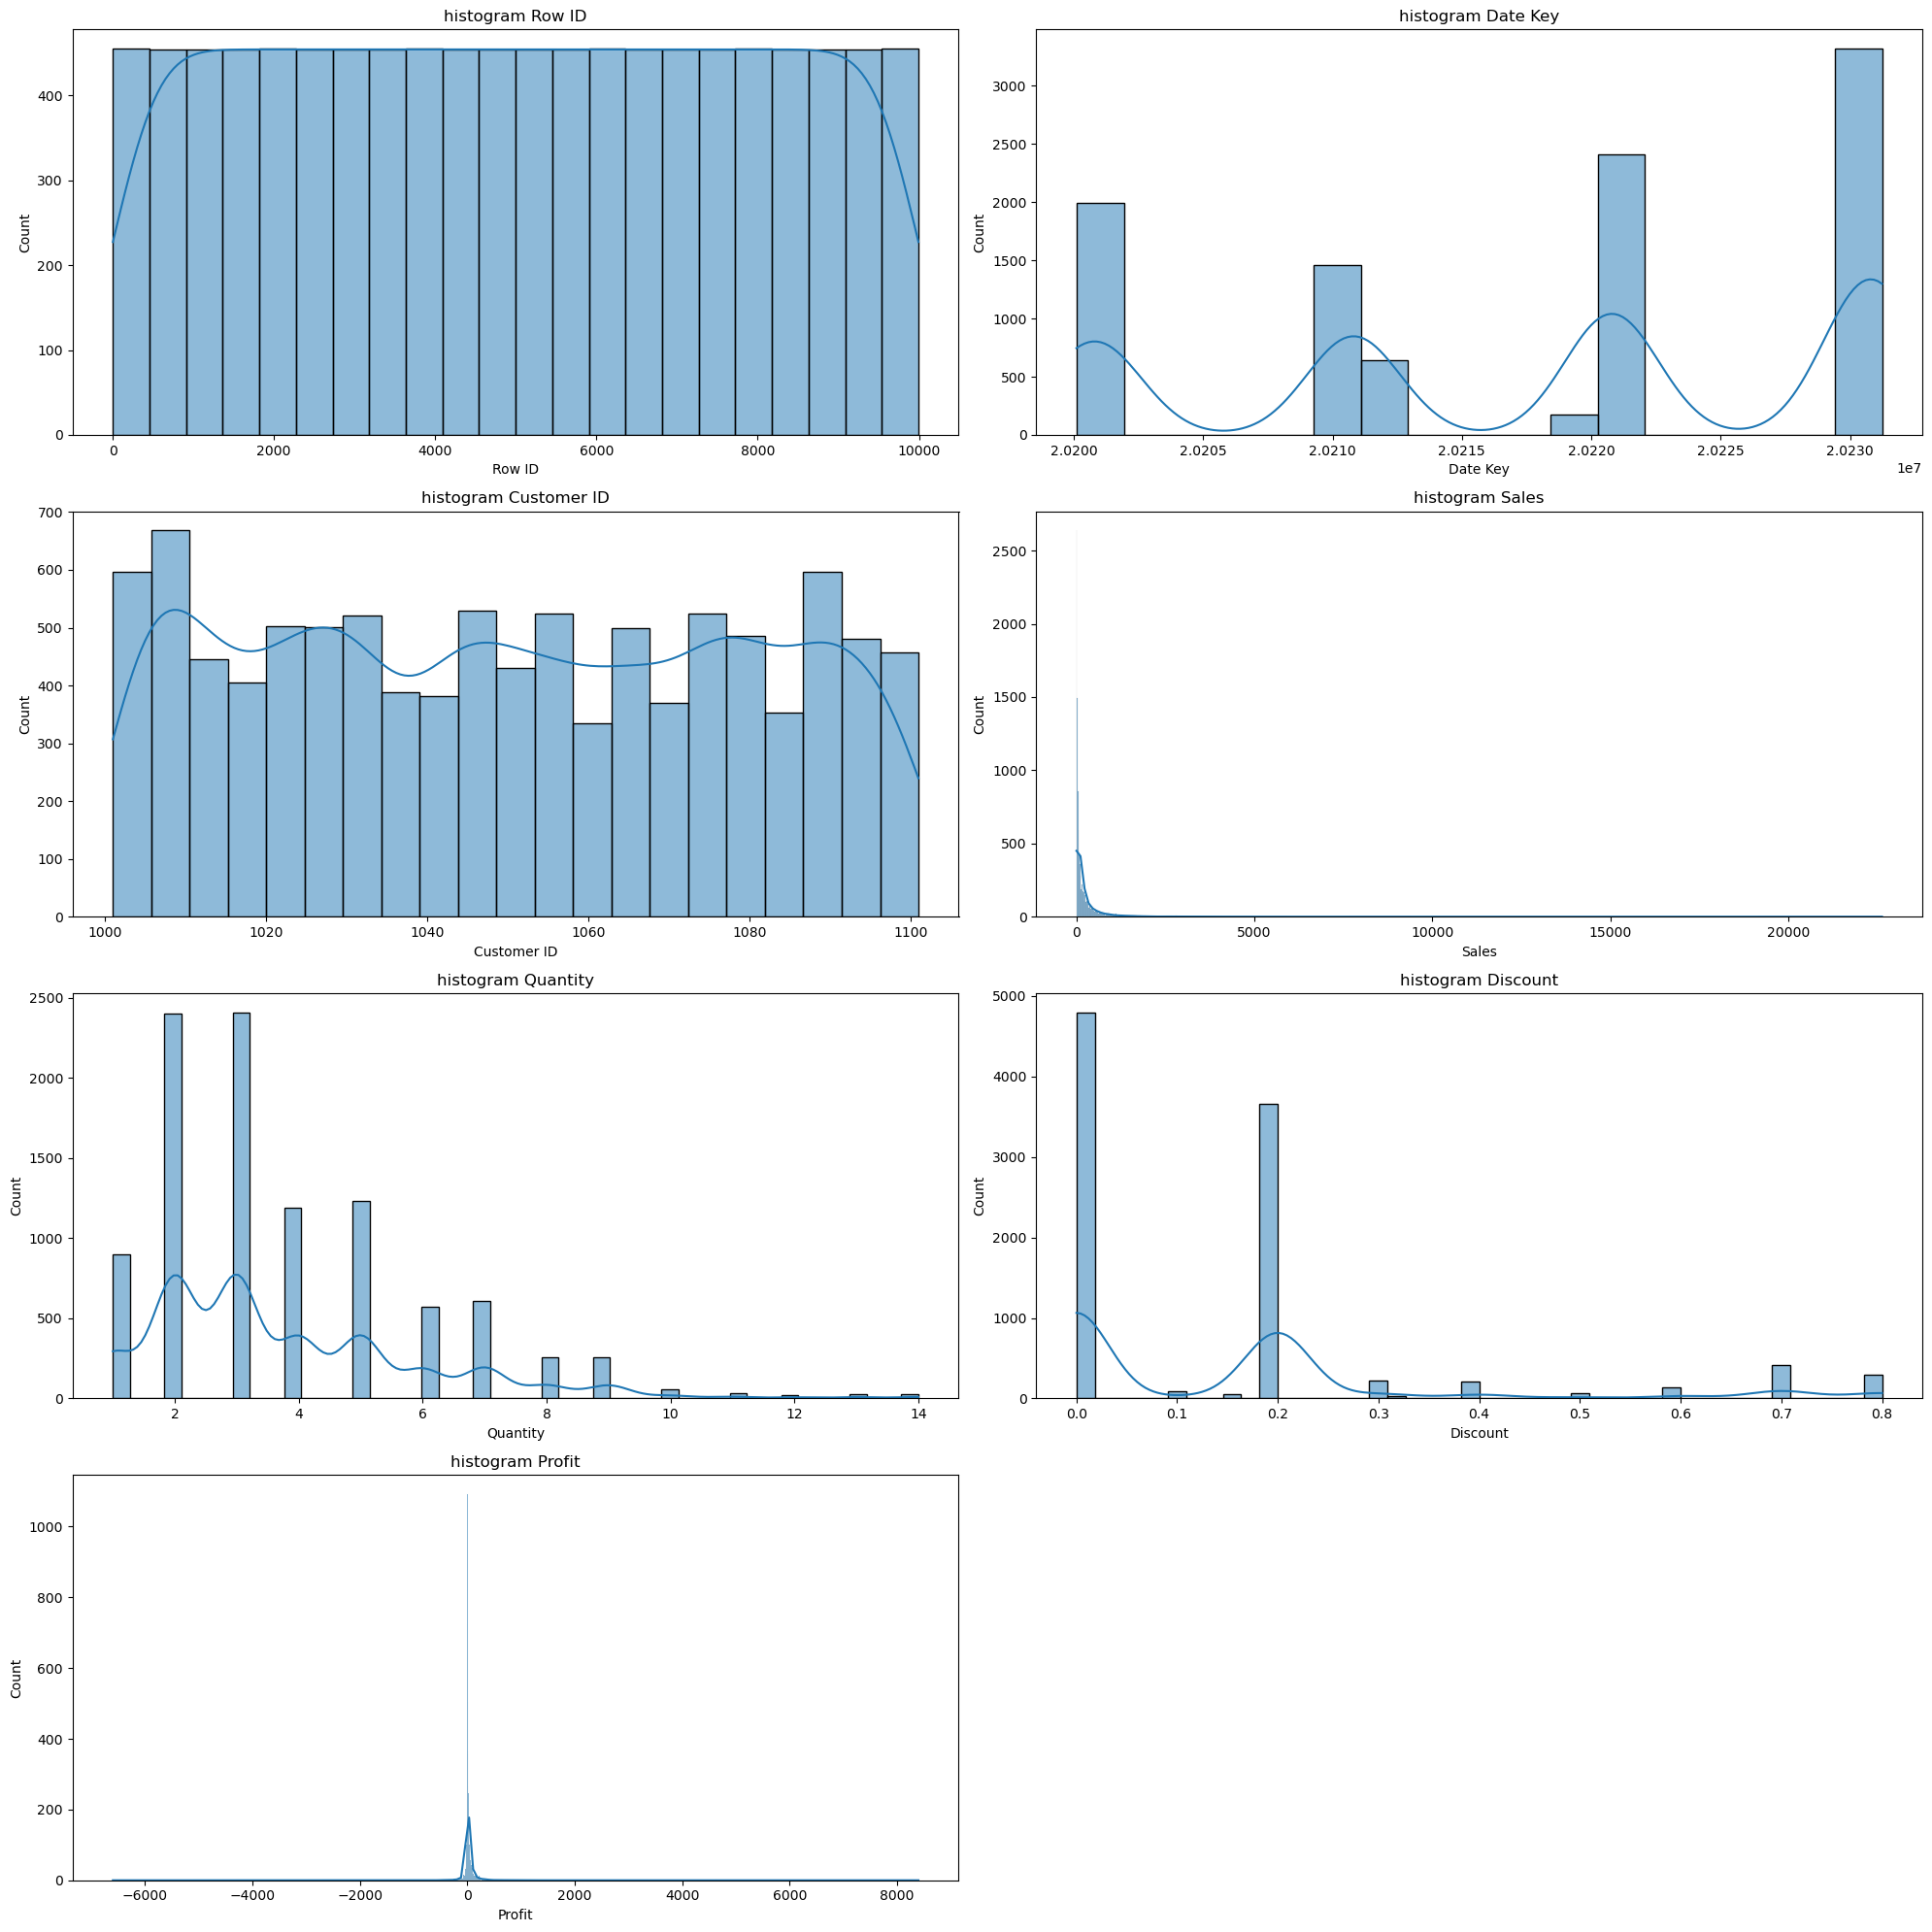

In [8]:

fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

num_cols = numerik.shape[1]  # Get the number of columns in the DataFrame
num_rows = (num_cols // 2) + (num_cols % 2)  # Calculate the number of rows needed

for i, kolom in enumerate(numerik.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")

plt.tight_layout() # biar tida

Berdasarkan data diatas menunjukan bahwa distribusi tidak normal untuk data Sales, Quantity, Discount dan Profit

### Outliers

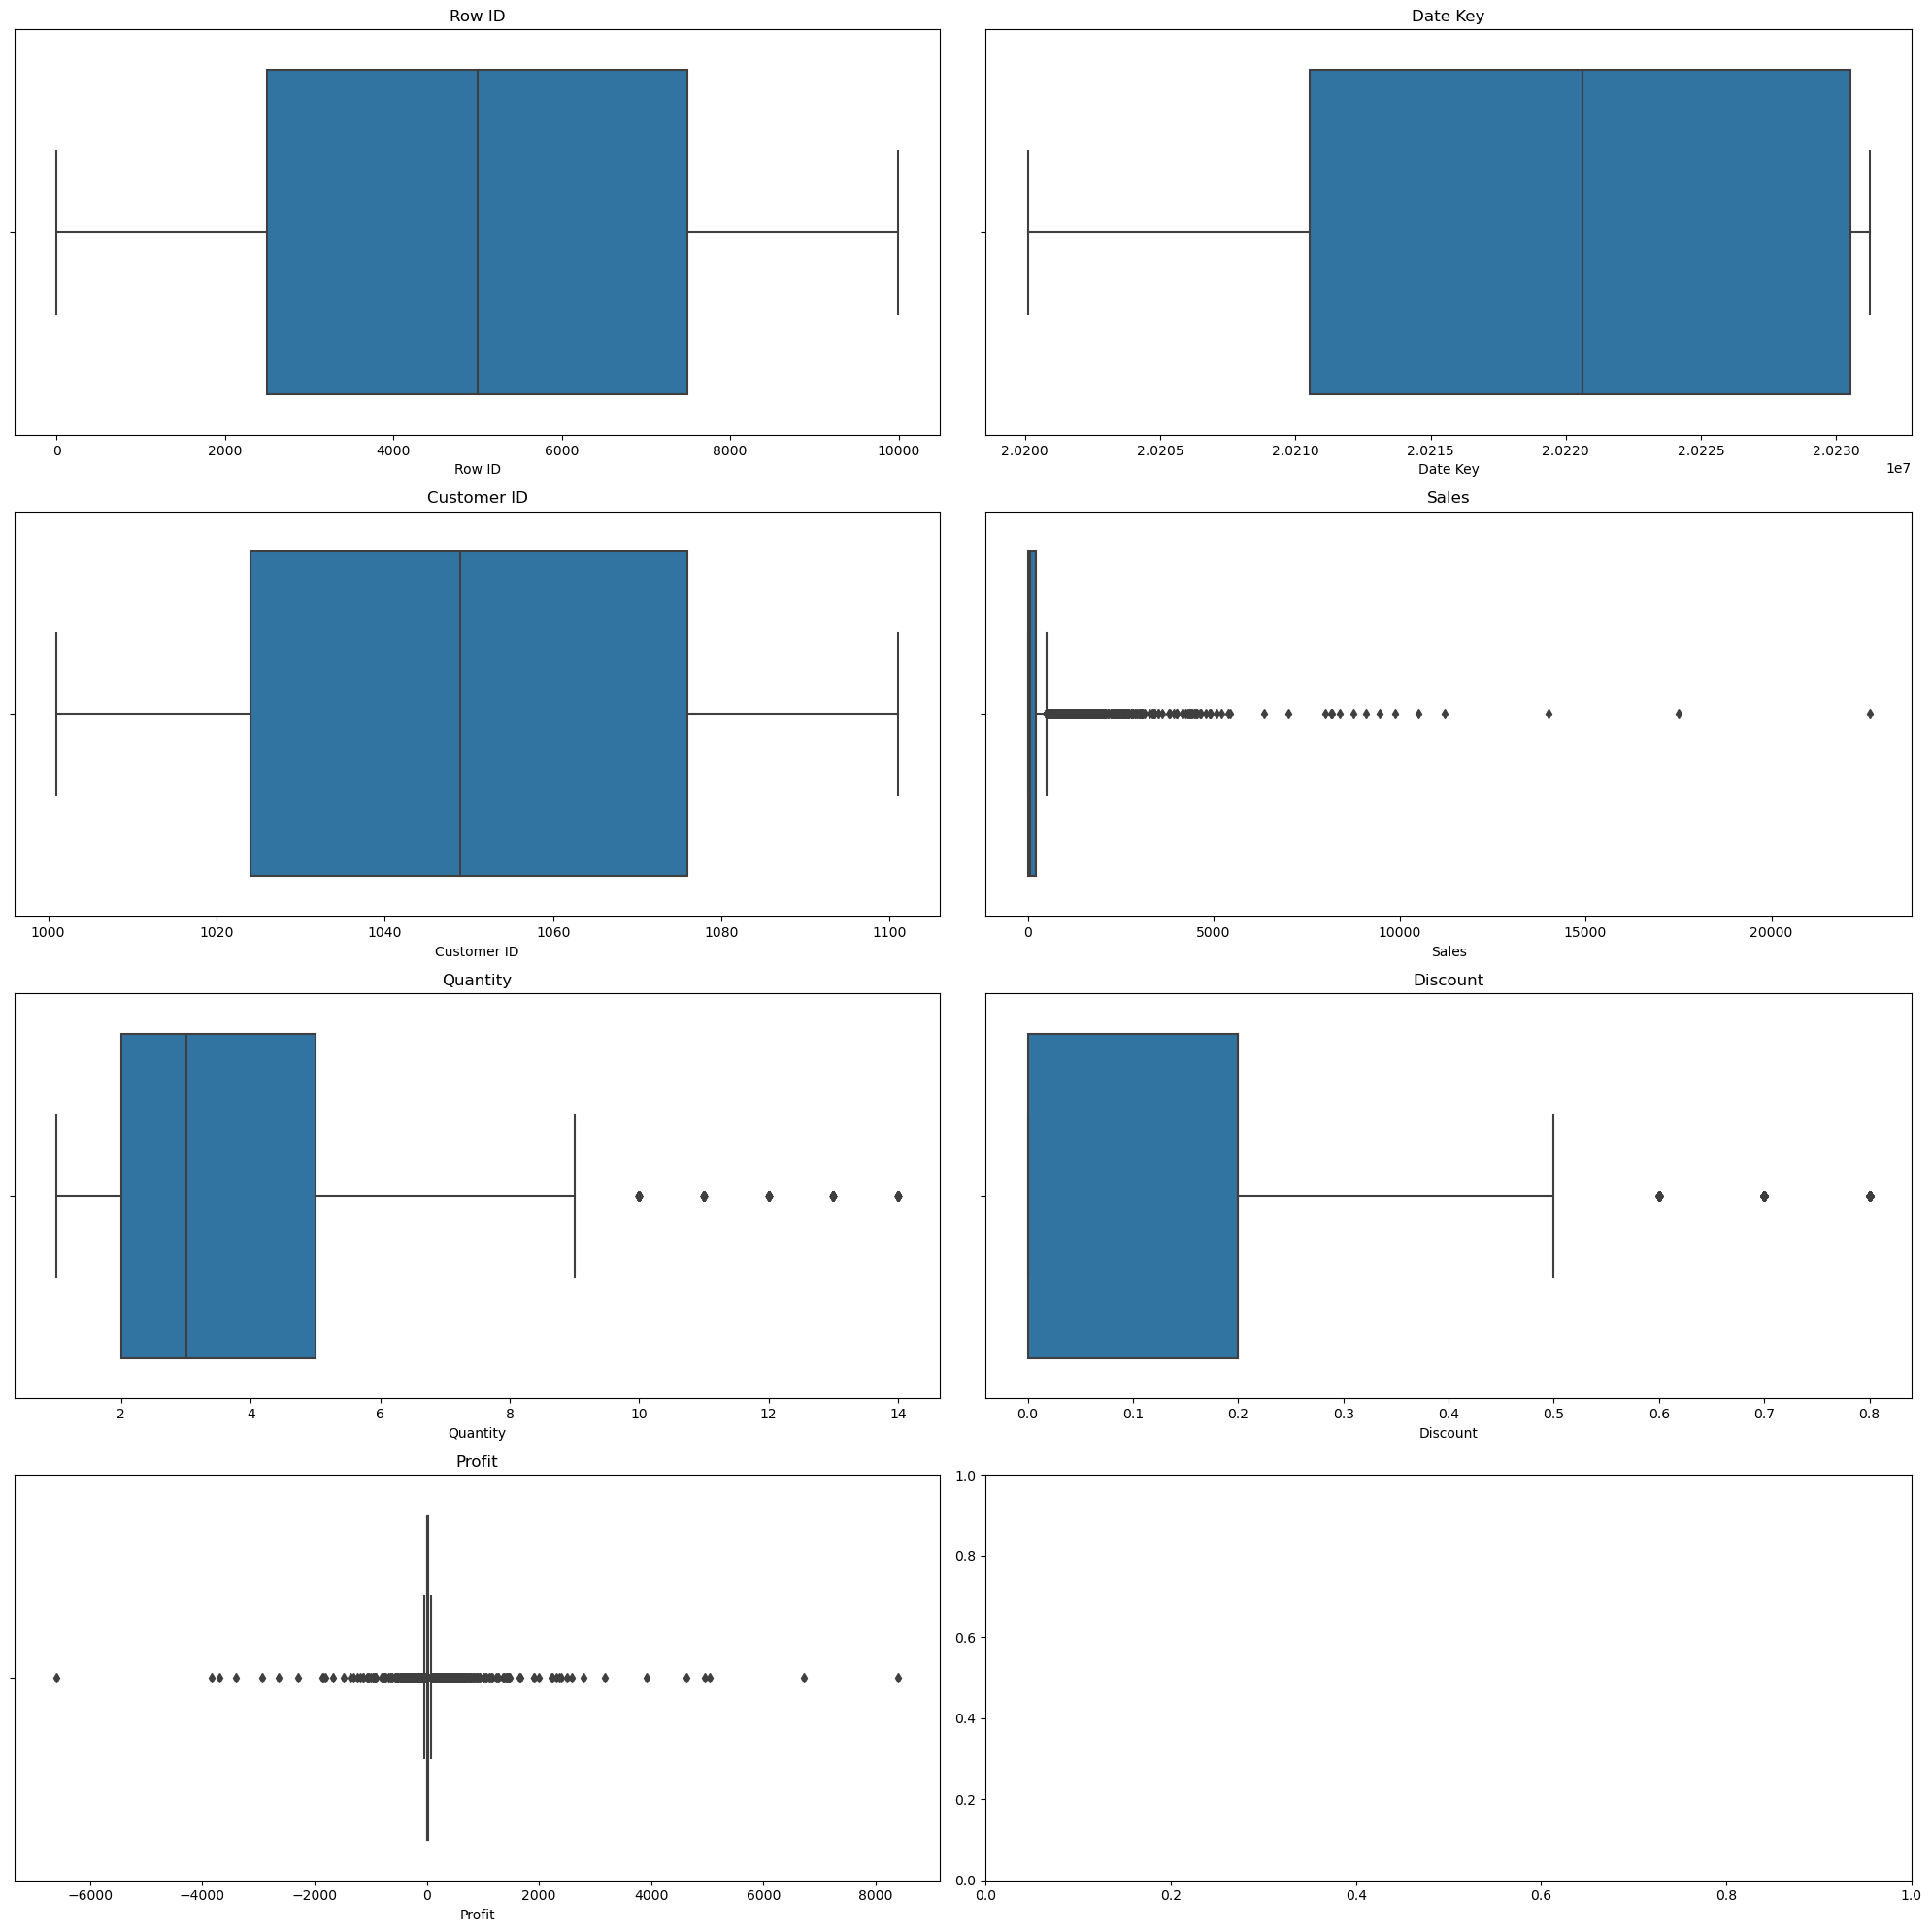

In [9]:
num_cols = numerik.shape[1]  # Get the number of numerical columns

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)
num_cols = min(2, num_cols)  # Limit maximum number of columns to 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, kolom in enumerate(numerik.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.boxplot(data=numerik, x=kolom, ax=ax)
    ax.set_title(kolom)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [10]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"data{kolom} memiliki outliers {jumlah_outliers}")

dataRow ID memiliki outliers 0
dataDate Key memiliki outliers 0
dataCustomer ID memiliki outliers 0
dataSales memiliki outliers 1167
dataQuantity memiliki outliers 170
dataDiscount memiliki outliers 856
dataProfit memiliki outliers 1881


Walaupun dalam data ini memiliki outliers tetapi diputuskan untuk tidak di hapus dikarenakan data masih relevan dan data yang memiliki outliers memiliki keterhubungan satu sama lain sehingga bisa mendapatkan suatu temuan dan insight yang berguna untuk perusahaan dalam hal strategi, segmentasi dan target perusahaan

### Korelasi

In [11]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr(method='spearman')

<Axes: >

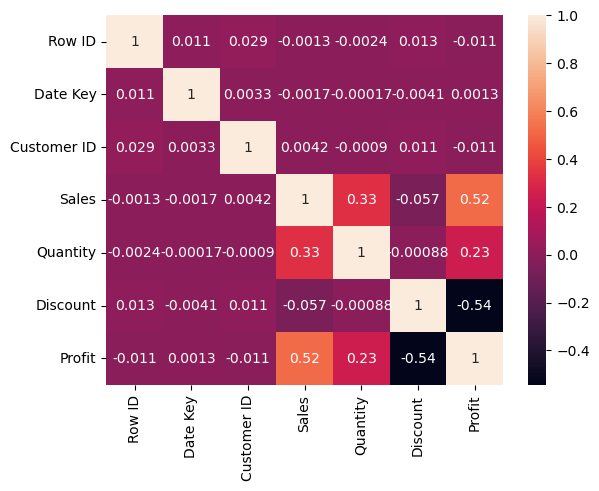

In [12]:
sns.heatmap(numeric_df.corr(method='spearman'), annot=True)

- Variabel Sales dengan quantity dan profit memiliki hubungan positif
- Variabel Quantity dengan sales dan profit juga memiliki hubungan positif
- sementara variabel discount memiliki hubungan yang negatif dengan profit

## Kategorik

In [13]:
kategorik = df.select_dtypes(exclude='number')

In [14]:
kategorik

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,JI6BVL70HQ
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,I5SVMI6M88
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,JHLW4P6LQ2


### Count Values

In [15]:
kategorik.nunique()

Order ID        5009
Order Date      1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Industry          10
Segment            3
Product           14
License         9994
dtype: int64

Pada data diatas dapat dijelaskan sebagai berikut
- memiliki 5009 order ID
- Order Date      1237
- Contact Name     793
- Country           48
- City             262
- Region             3
- Subregion         12
- Customer          99
- Industry          10
- Segment            3
- Product           14
- License         9994

### Modus 

In [16]:
kategorik.describe(include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


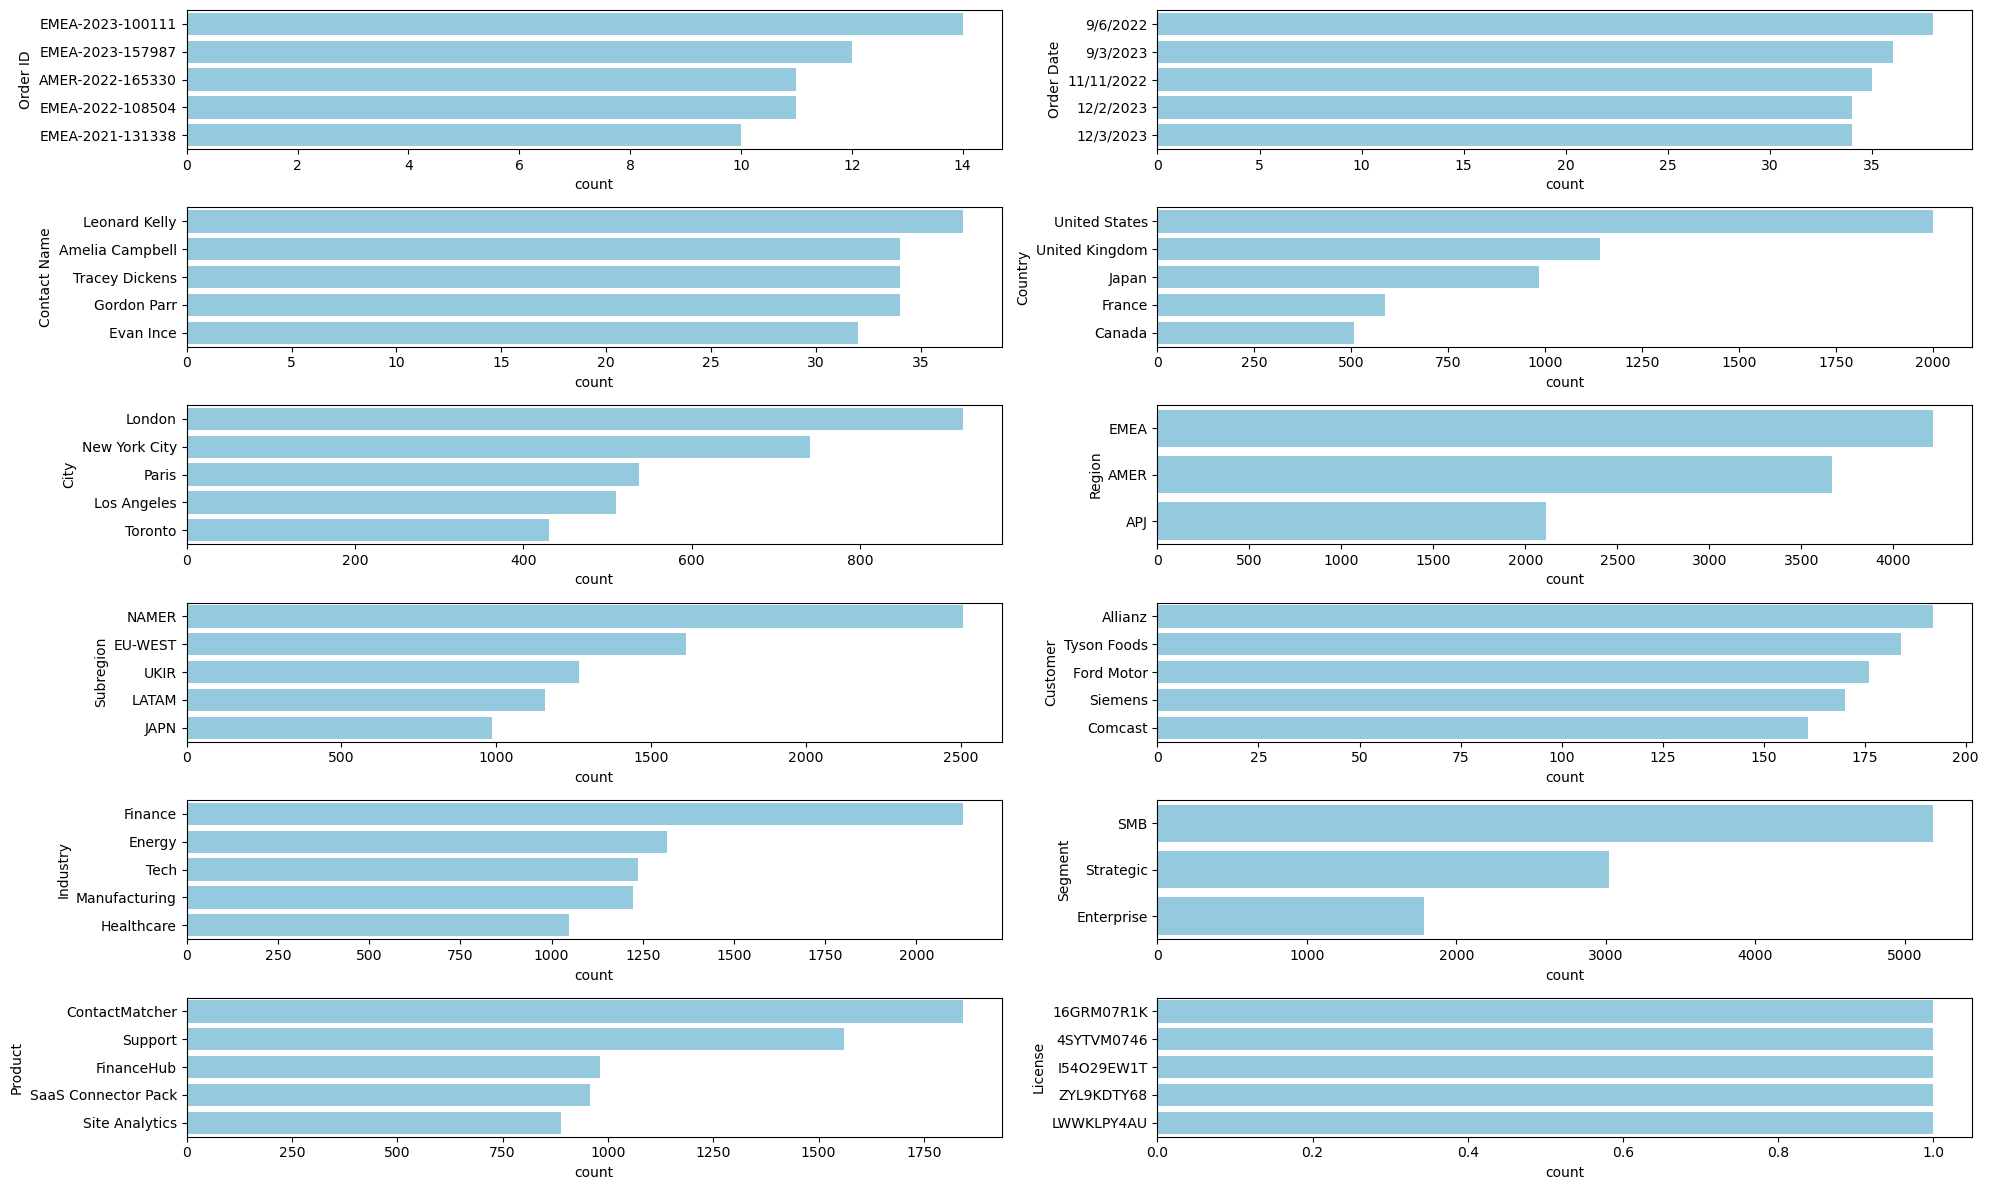

In [17]:
num_variables = len(kategorik.columns)
num_rows = (num_variables + 1) // 2  # Determine the number of rows needed for subplots
num_cols = min(2, num_variables)  # Limit the number of columns to 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, kolom in enumerate(kategorik.columns):
    sns.countplot(y=kolom, 
                  data=kategorik, 
                  order=kategorik[kolom].value_counts().sort_values(ascending=False).head(5).index, 
                  color='skyblue',
                  ax=axes[i // num_cols, i % num_cols])

fig.tight_layout()
plt.show()

- pada variable Order ID yang paling banyak muncul adalah EMEA-2023-100111
- pada variable Contract Name yang paling banyak muncul adalah Leonard Kelly
- pada variable City yang paling banyak muncul adalah London
- pada variable Subregion yang paling banyak muncul adalah Namer
- pada variable Industry yang paling banyak muncul adalah Finance
- pada variable Product yang paling banyak muncul adalah ContactMatcher
- pada variable OrderDate yang paling banyak muncul adalah 9/6/2022
- pada variable Country yang paling banyak muncul adalah United State
- pada variable Region yang paling banyak muncul adalah EMEA
- pada variable Subregion yang paling banyak muncul adalah Alianz
- pada variable Segment yang paling banyak muncul adalah SMB
- pada variable License yang paling banyak muncul adalah 16GRM07R1K


# Data Cleaning

In [17]:
 # ini penting agar tidak terlalu jauh kalau ingin mengulang cleaning
df_prep = df.copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [19]:
# Mengonversi kolom 'Order Date' menjadi tipe data datetime
df_prep['Order Date'] = pd.to_datetime(df_prep['Order Date'])

# Mengonversi kolom 'Date Key' menjadi tipe data datetime
df_prep['Date Key'] = pd.to_datetime(df_prep['Date Key'])

# Mengonversi kolom 'Customer ID' menjadi tipe data string
df_prep['Customer ID'] = df_prep['Customer ID'].astype(str)

# Menampilkan beberapa baris pertama dari DataFrame yang telah diubah
print(df_prep.head())

   Row ID          Order ID Order Date                      Date Key  \
0       1  EMEA-2022-152156 2022-11-09 1970-01-01 00:00:00.020221109   
1       2  EMEA-2022-152156 2022-11-09 1970-01-01 00:00:00.020221109   
2       3  AMER-2022-138688 2022-06-13 1970-01-01 00:00:00.020220613   
3       4  EMEA-2021-108966 2021-10-11 1970-01-01 00:00:00.020211011   
4       5  EMEA-2021-108966 2021-10-11 1970-01-01 00:00:00.020211011   

     Contact Name        Country           City Region Subregion  \
0     Nathan Bell        Ireland         Dublin   EMEA      UKIR   
1     Nathan Bell        Ireland         Dublin   EMEA      UKIR   
2  Deirdre Bailey  United States  New York City   AMER     NAMER   
3      Zoe Hodges        Germany      Stuttgart   EMEA   EU-WEST   
4      Zoe Hodges        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Customer ID Industry    Segment                 Product  \
0            Chevron        1017   Energy        SMB         Marketing Suite  

In [20]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   datetime64[ns]
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

Terdapat 3 column dengan tipe data yang kurang tepat seperti
1. Order date dari Str menjadi Date time
2. Date Key dari Str menjadi Date Time
3. Customer ID dari Int menjadi Str

## Handling Missing Values

<Axes: >

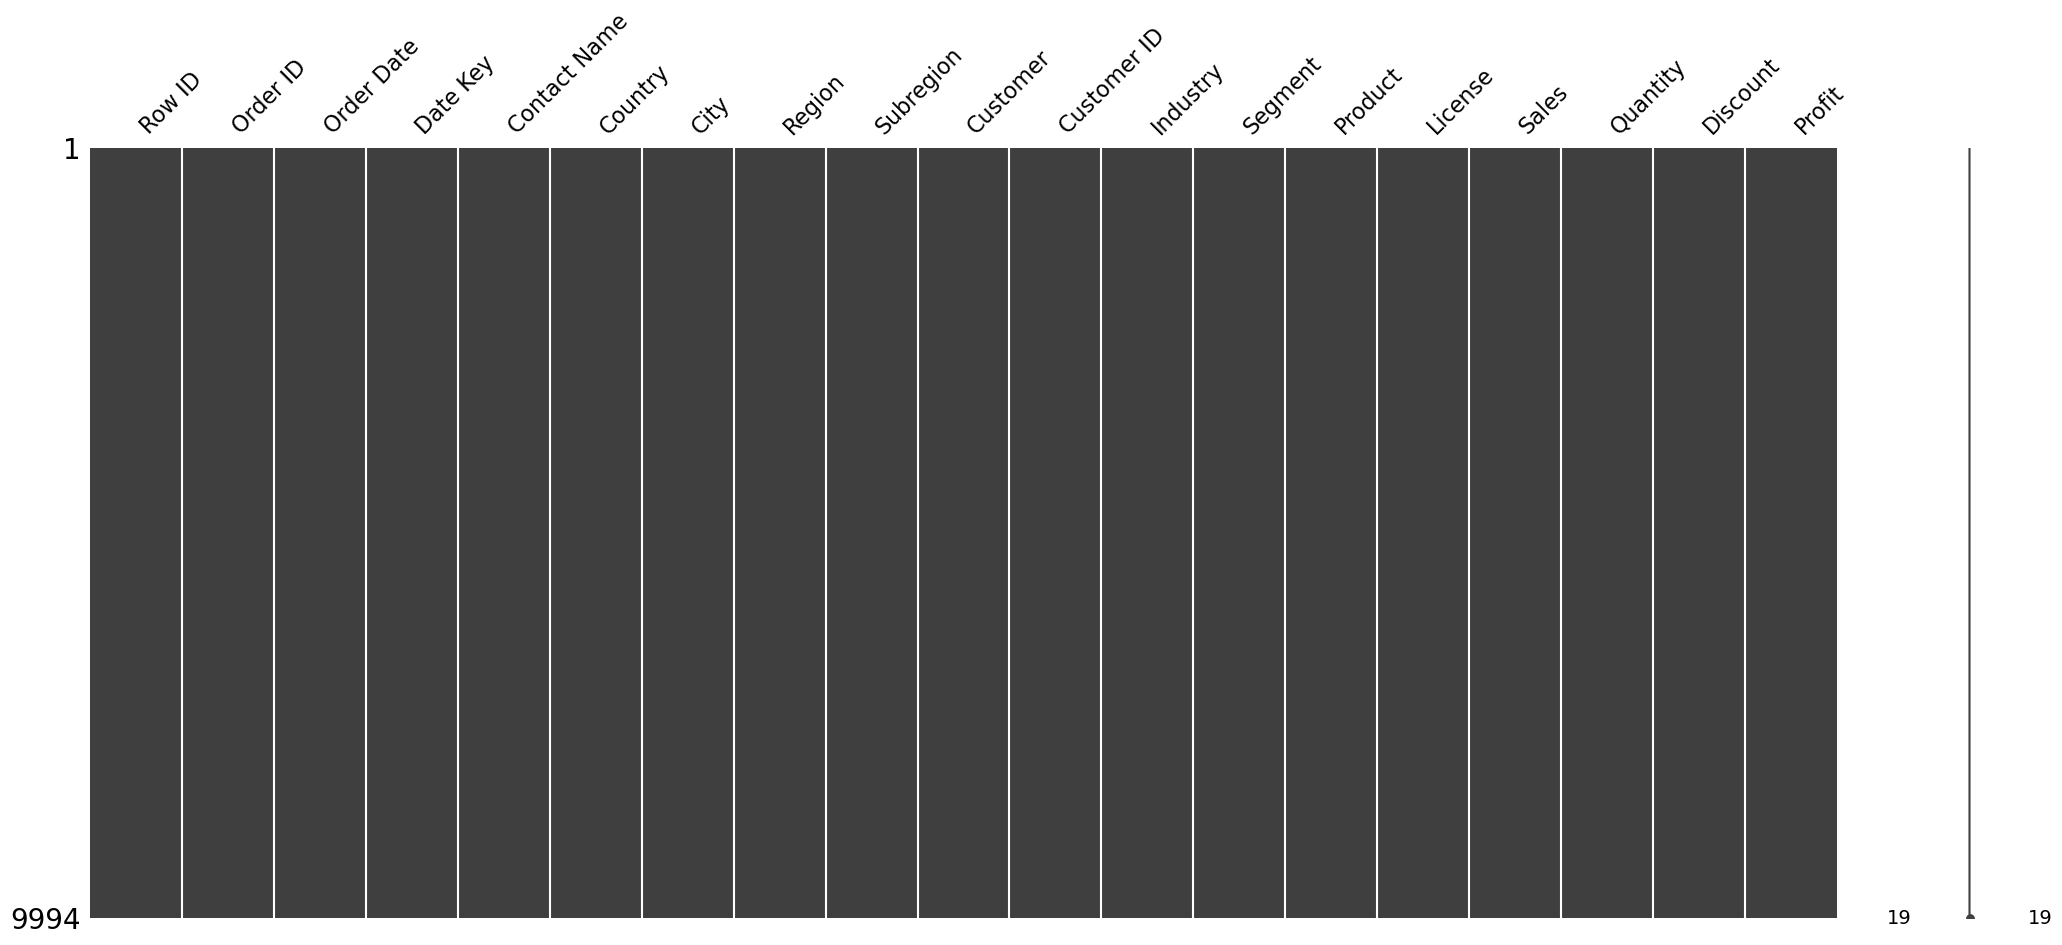

In [21]:
import missingno
missingno.matrix(df_prep)

In [22]:
# cek data yang missing values

df_prep[df_prep.isna().any(axis = 1)] # menunjukkan semua data yang missing

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Tidak memiliki data yang missing

## Handling untuk outliers

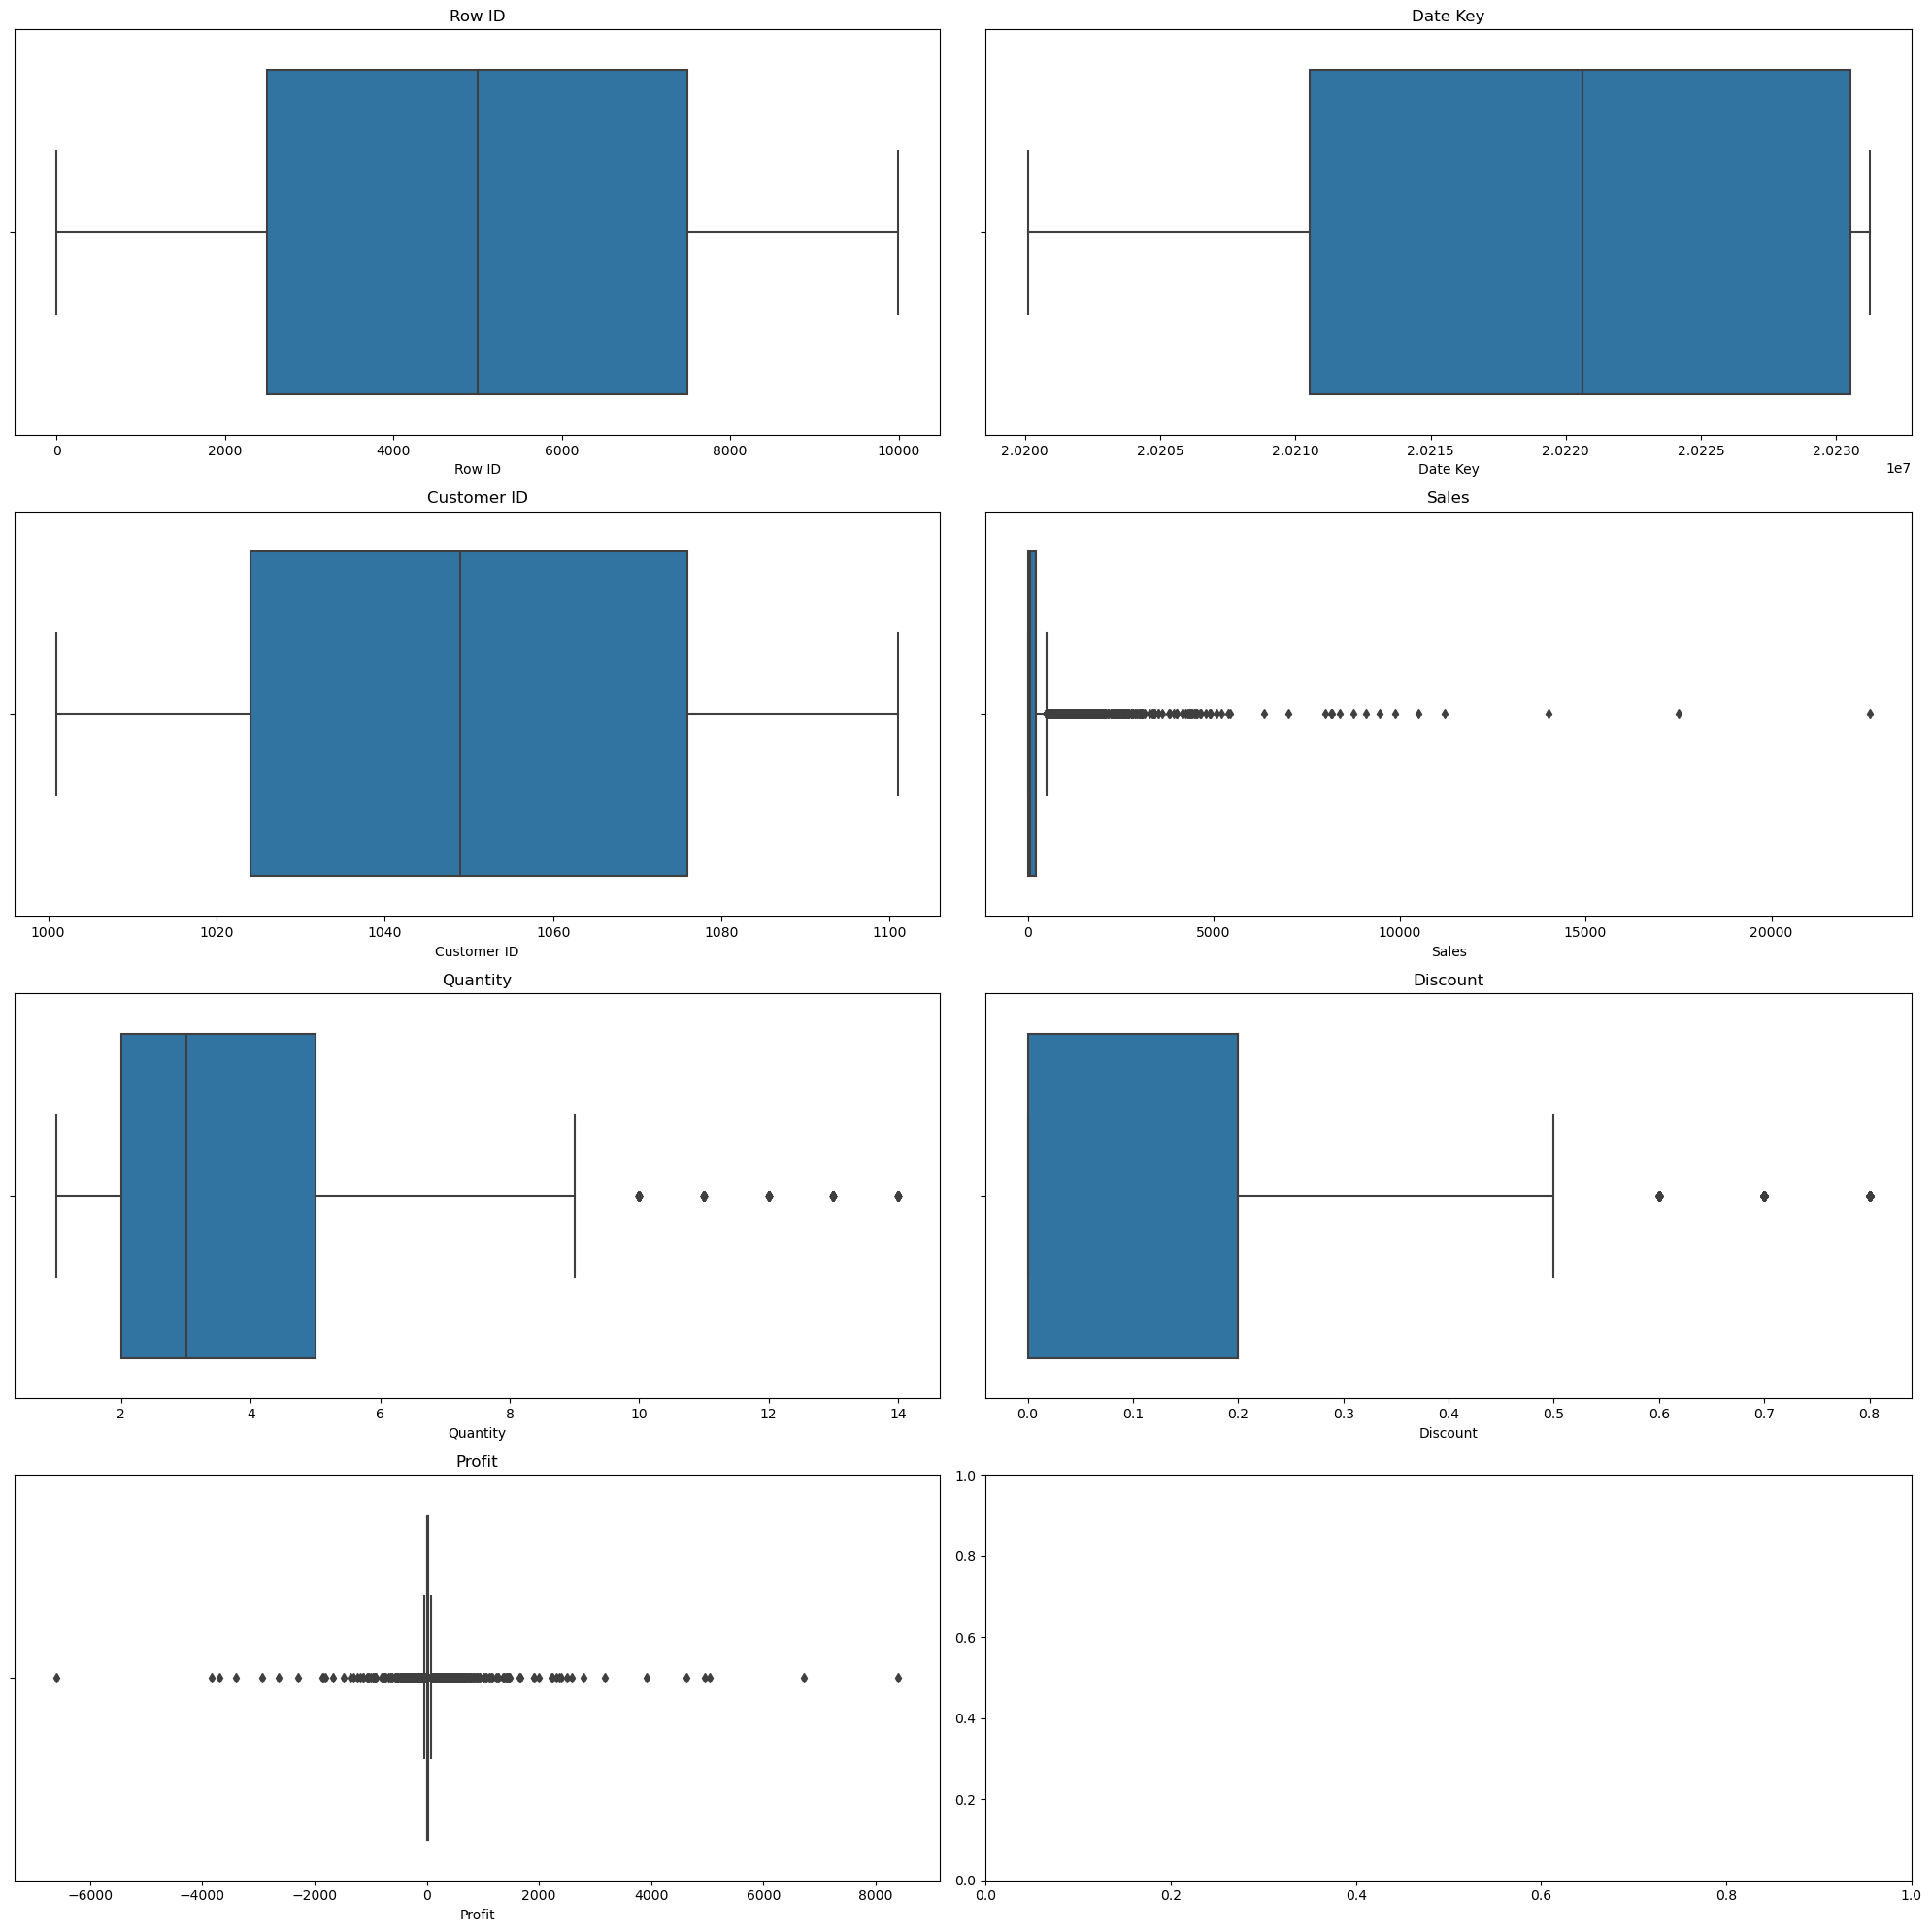

In [23]:
num_cols = numerik.shape[1]  # Get the number of numerical columns

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)
num_cols = min(2, num_cols)  # Limit maximum number of columns to 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, kolom in enumerate(numerik.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.boxplot(data=numerik, x=kolom, ax=ax)
    ax.set_title(kolom)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# EDA (Exploratory Data Analysis)

Ranks sebagai metrics utama, jadi kita bandingkan dengan semuanya


- variabel target (dependen) : Profit
- variabel yang mempengaruhi (independen) : kolom lainnya

## Profit for each numeric

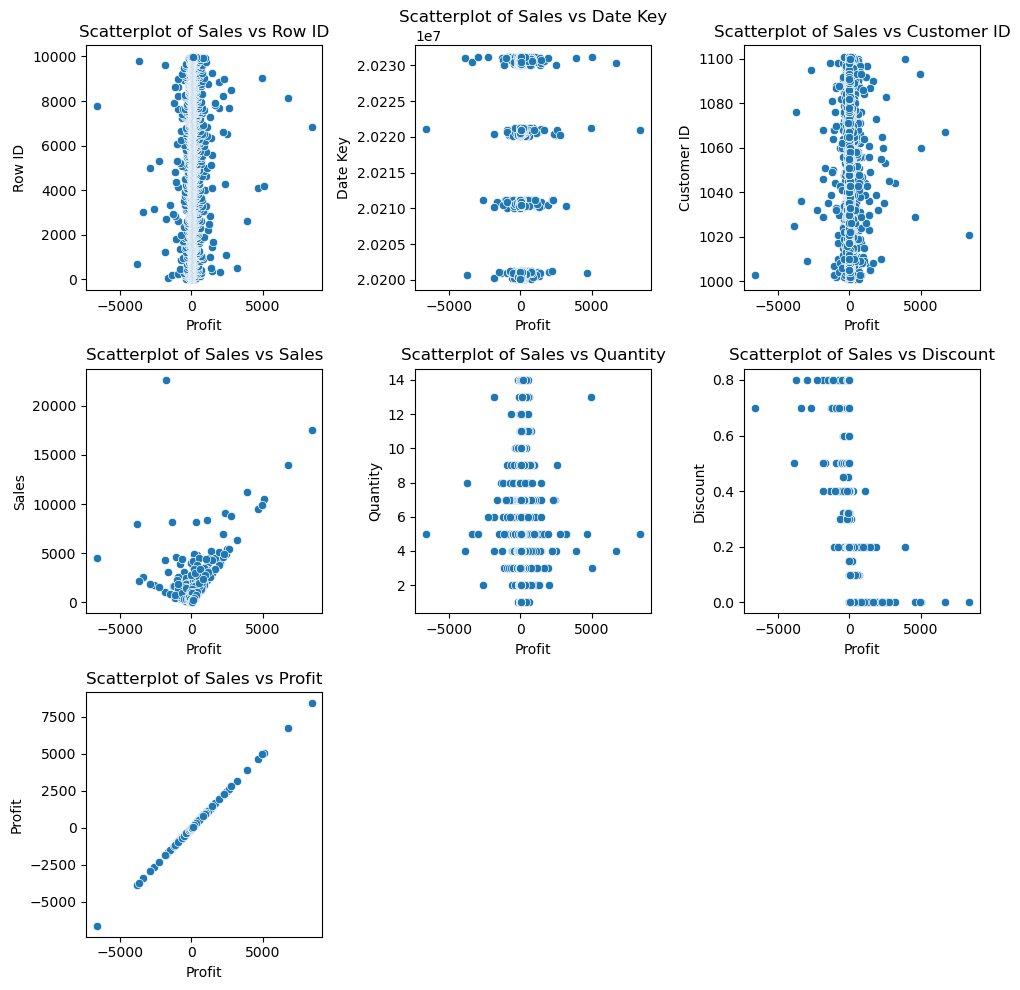

In [24]:
fig = plt.figure(figsize=(10, 10))


count = 0
for kolom in numerik.columns:
    count += 1
    if count > 9:  # If more than 6 subplots, break the loop
        break
    plt.subplot(3, 3, count)
    sns.scatterplot(x=numerik['Profit'], y=numerik[kolom])
    plt.title(f"Scatterplot of Sales vs {kolom}")

fig.tight_layout()
plt.show()

## Ranks for each class / categoric

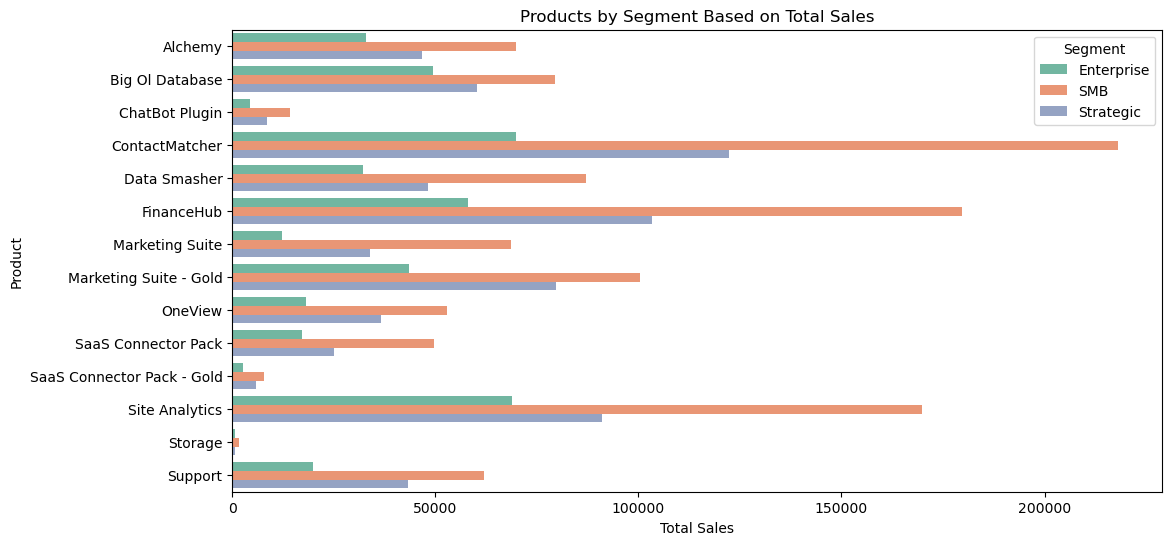

In [25]:
segment_product_sales = df_prep.groupby(['Segment', 'Product'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Barplot with 'Segment' as hue
sns.barplot(data=segment_product_sales, x='Sales', y='Product', hue='Segment', palette='Set2')

# Add title and labels
plt.title('Products by Segment Based on Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')

# Show the plot
plt.show()

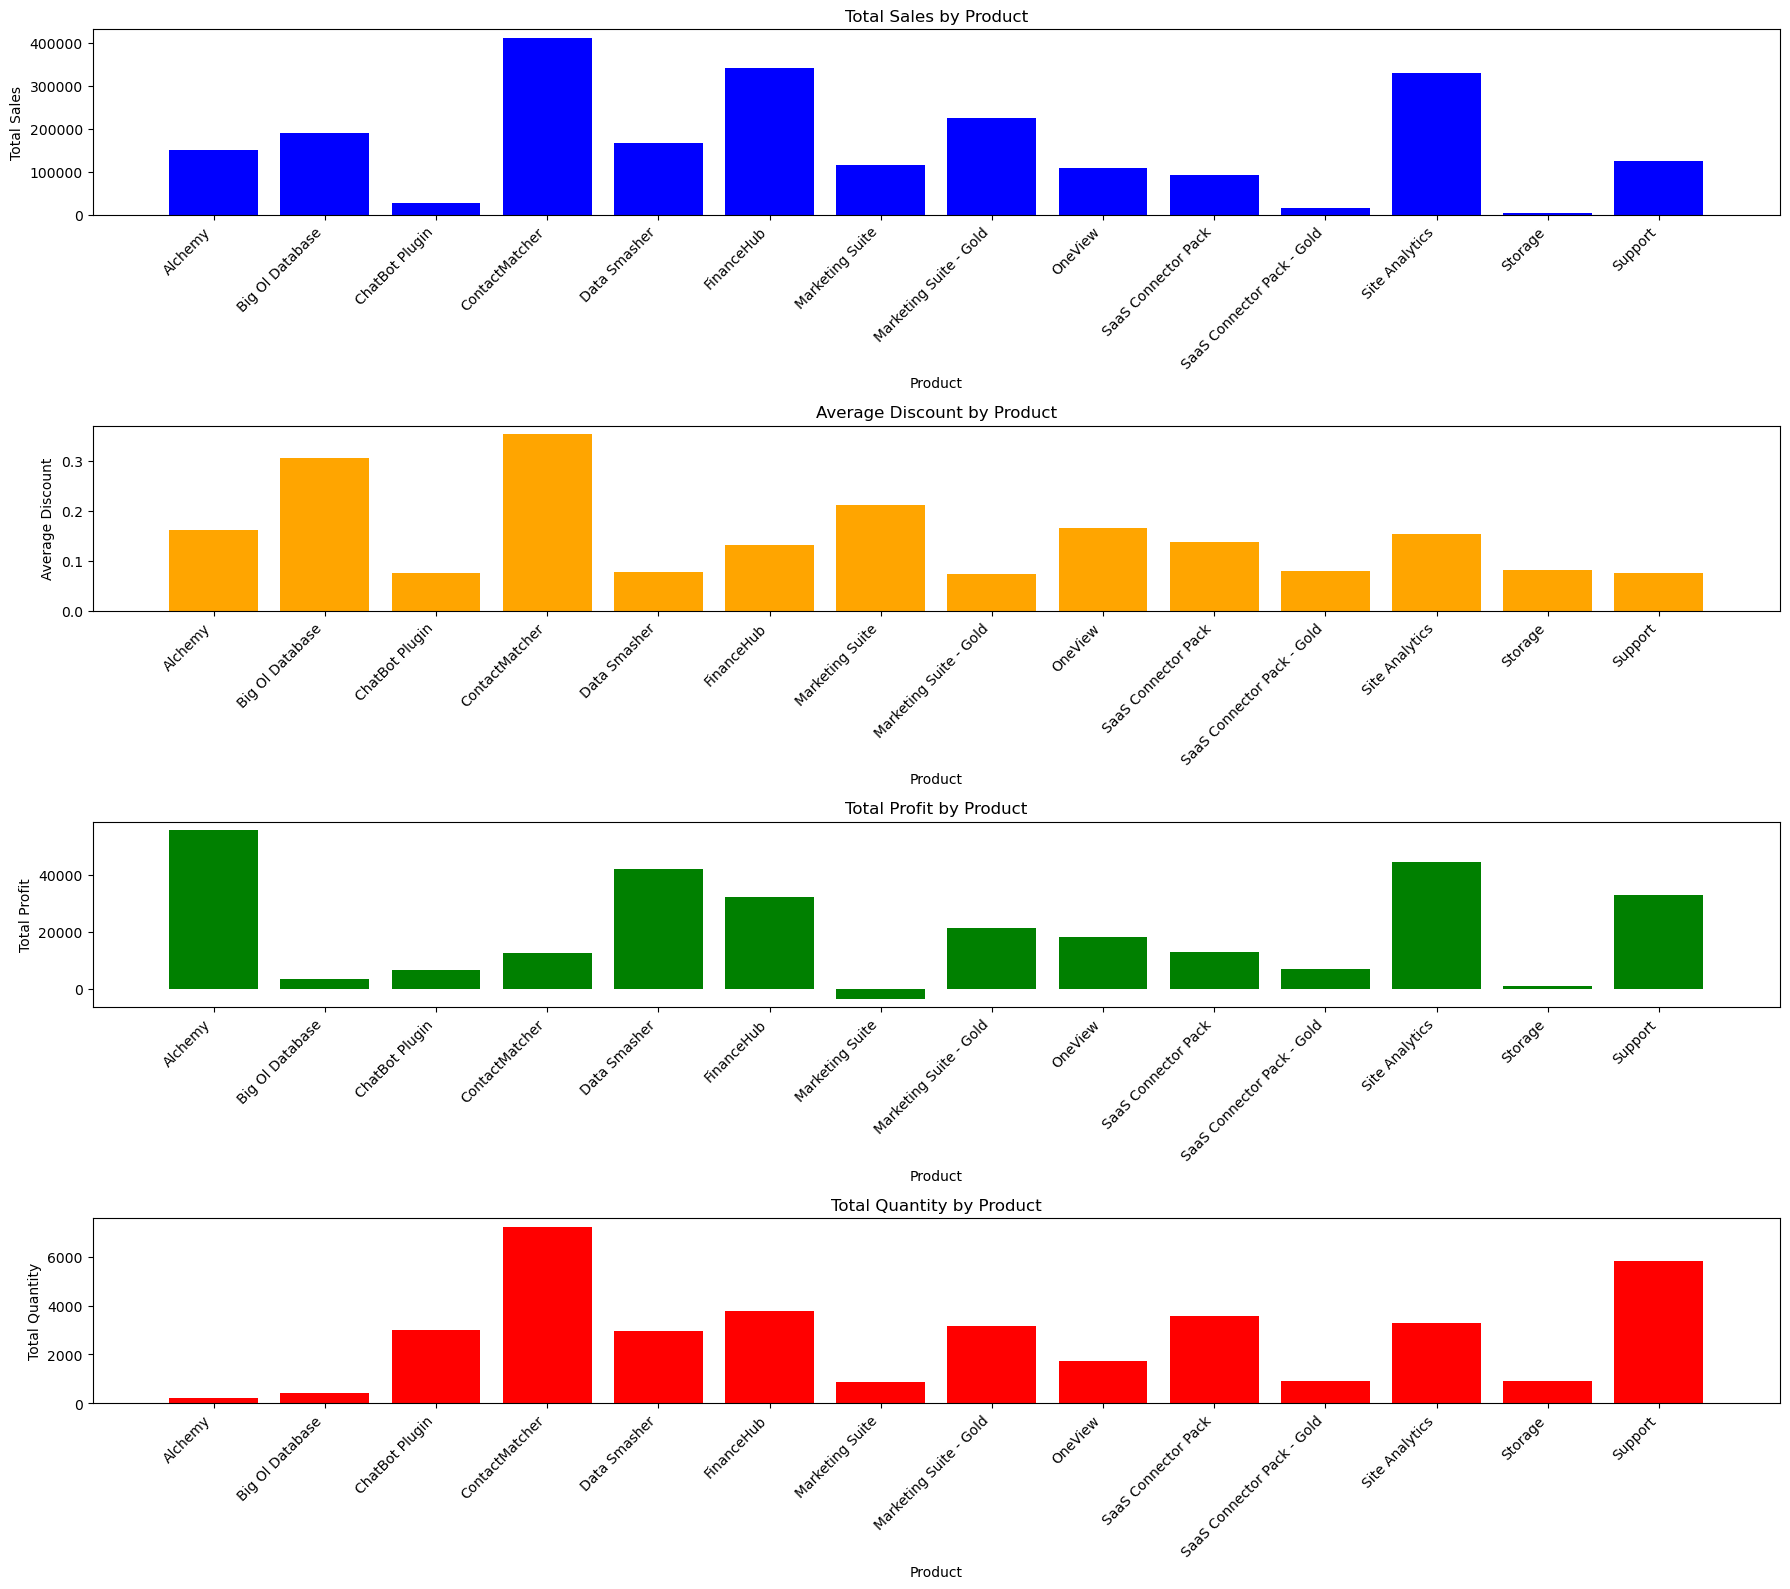

In [26]:
total_sales_by_product = df_prep.groupby('Product')['Sales'].sum().reset_index()
avg_discount_by_product = df_prep.groupby('Product')['Discount'].mean().reset_index()
total_profit_by_product = df_prep.groupby('Product')['Profit'].sum().reset_index()
total_quantity_by_product = df_prep.groupby('Product')['Quantity'].sum().reset_index()

# Sort the DataFrames by the 'Product' column in ascending order
total_sales_by_product = total_sales_by_product.sort_values(by='Product')
avg_discount_by_product = avg_discount_by_product.sort_values(by='Product')
total_profit_by_product = total_profit_by_product.sort_values(by='Product')
total_quantity_by_product = total_quantity_by_product.sort_values(by='Product')

# Set up the figure and subplots
plt.figure(figsize=(18, 16))

# Plot 1: Total Sales by Product
plt.subplot(4, 1, 1)
plt.bar(total_sales_by_product['Product'], total_sales_by_product['Sales'], color='blue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

# Plot 2: Average Discount by Product
plt.subplot(4, 1, 2)
plt.bar(avg_discount_by_product['Product'], avg_discount_by_product['Discount'], color='orange')
plt.title('Average Discount by Product')
plt.xlabel('Product')
plt.ylabel('Average Discount')
plt.xticks(rotation=45, ha='right')

# Plot 3: Total Profit by Product
plt.subplot(4, 1, 3)
plt.bar(total_profit_by_product['Product'], total_profit_by_product['Profit'], color='green')
plt.title('Total Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')

# Plot 4: Total Quantity by Product
plt.subplot(4, 1, 4)
plt.bar(total_quantity_by_product['Product'], total_quantity_by_product['Quantity'], color='red')
plt.title('Total Quantity by Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

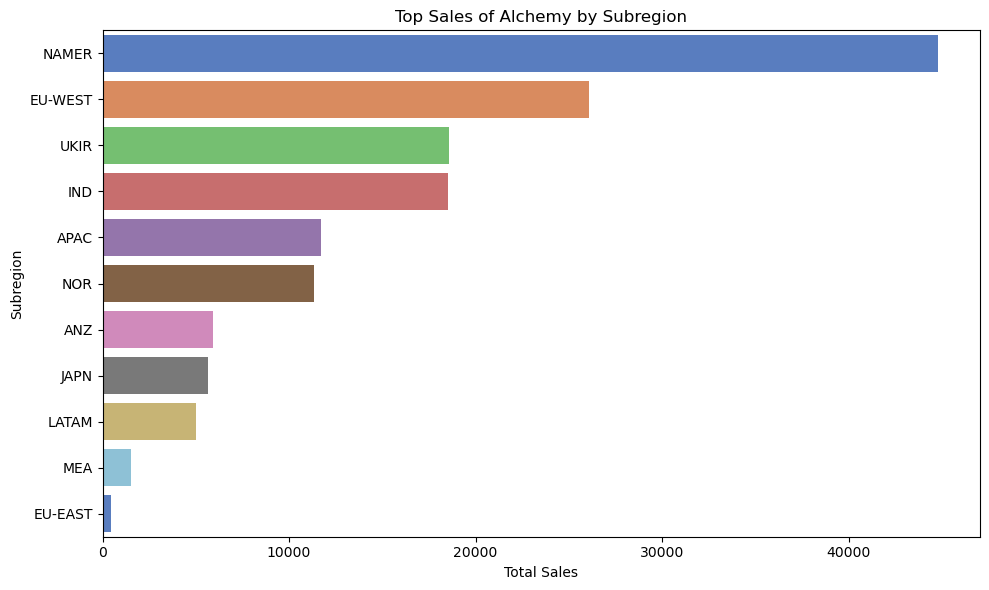

In [27]:
alchemy_sales = df_prep[df_prep['Product'] == 'Alchemy']

# Group by Subregion and calculate the total sales for each subregion
subregion_sales_alchemy = alchemy_sales.groupby('Subregion')['Sales'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
subregion_sales_alchemy = subregion_sales_alchemy.sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(data=subregion_sales_alchemy, x='Sales', y='Subregion', palette='muted')

# Add title and labels
plt.title('Top Sales of Alchemy by Subregion')
plt.xlabel('Total Sales')
plt.ylabel('Subregion')

# Show the plot
plt.tight_layout()
plt.show()

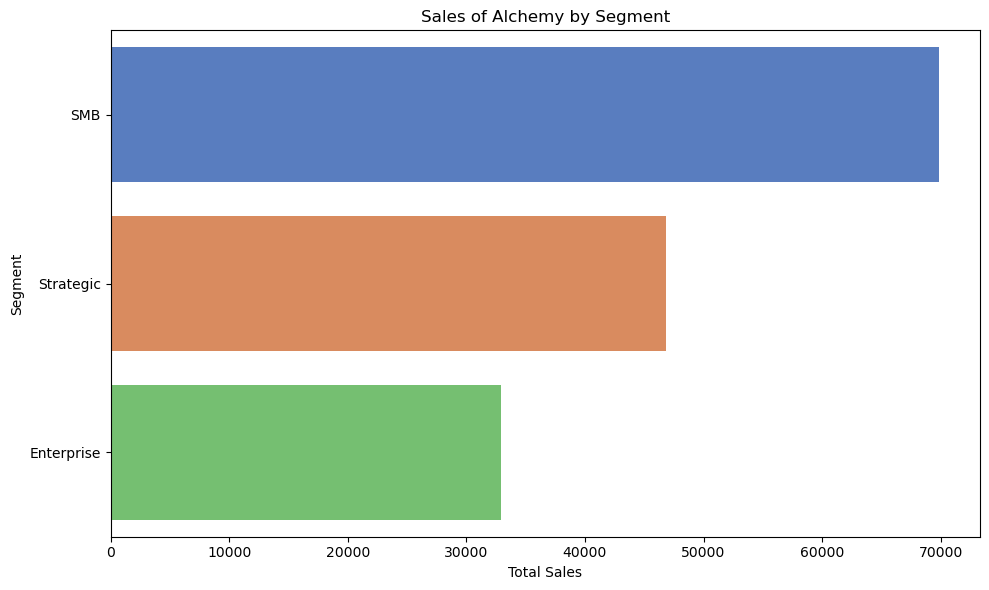

In [28]:
alchemy_sales = df_prep[df_prep['Product'] == 'Alchemy']

# Group by Segment and calculate the total sales for each segment
segment_sales_alchemy = alchemy_sales.groupby('Segment')['Sales'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
segment_sales_alchemy = segment_sales_alchemy.sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(data=segment_sales_alchemy, x='Sales', y='Segment', palette='muted')

# Add title and labels
plt.title('Sales of Alchemy by Segment')
plt.xlabel('Total Sales')
plt.ylabel('Segment')

# Show the plot
plt.tight_layout()
plt.show()

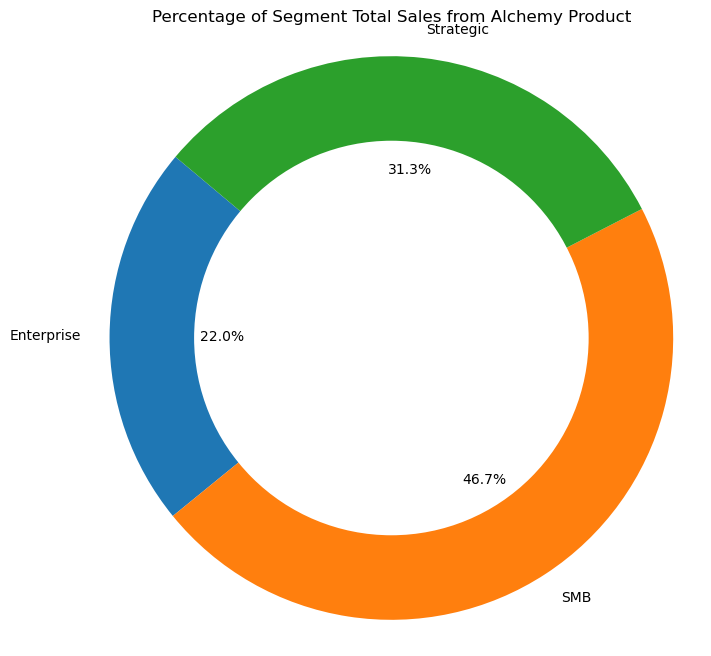

In [29]:
#Untuk melihat persentase total sales dari setiap segment yang bertransaksi produk Alchemy
alchemy_df = df_prep[df_prep['Product'] == 'Alchemy']

# Calculate total sales from Alchemy product
total_sales_alchemy = alchemy_df['Sales'].sum()

# Group by segment and calculate total sales for each segment
total_sales_by_segment = alchemy_df.groupby('Segment')['Sales'].sum()

# Calculate percentage of total sales for each segment compared to total sales from Alchemy product
percentage_sales_by_segment = (total_sales_by_segment / total_sales_alchemy) * 100

# Plot pie chart with percentage labels
plt.figure(figsize=(8, 8))
plt.pie(percentage_sales_by_segment, labels=percentage_sales_by_segment.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Segment Total Sales from Alchemy Product')

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.show()

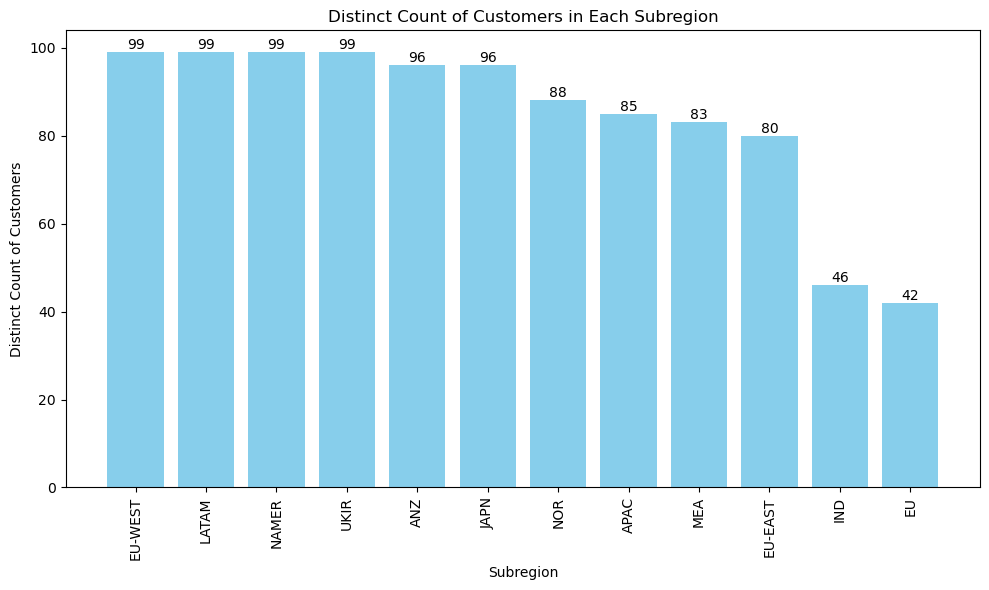

In [30]:
#Untuk melihat total Customer yang membeli di AWS berdasarkan sub region
subregion_counts = df_prep.groupby('Subregion')['Customer'].nunique().reset_index(name='Count')

# Sort the DataFrame by Count in descending order for better visualization
subregion_counts = subregion_counts.sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(subregion_counts['Subregion'], subregion_counts['Count'], color='skyblue')
plt.title('Distinct Count of Customers in Each Subregion')
plt.xlabel('Subregion')
plt.ylabel('Distinct Count of Customers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add count numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

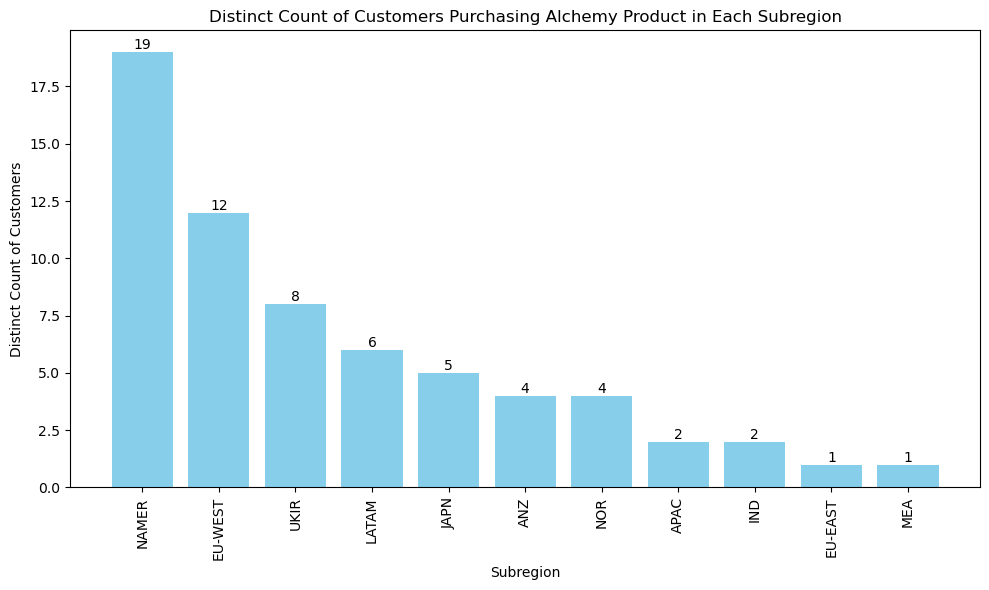

In [31]:
#Untuk melihat total Customer yang membeli alchemy
alchemy_df = df_prep[df_prep['Product'] == 'Alchemy']

# Group by subregion and count the distinct occurrences of customers
alchemy_subregion_counts = alchemy_df.groupby('Subregion')['Customer'].nunique().reset_index(name='Count')

# Sort the DataFrame by Count in descending order for better visualization
alchemy_subregion_counts = alchemy_subregion_counts.sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(alchemy_subregion_counts['Subregion'], alchemy_subregion_counts['Count'], color='skyblue')
plt.title('Distinct Count of Customers Purchasing Alchemy Product in Each Subregion')
plt.xlabel('Subregion')
plt.ylabel('Distinct Count of Customers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add count numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

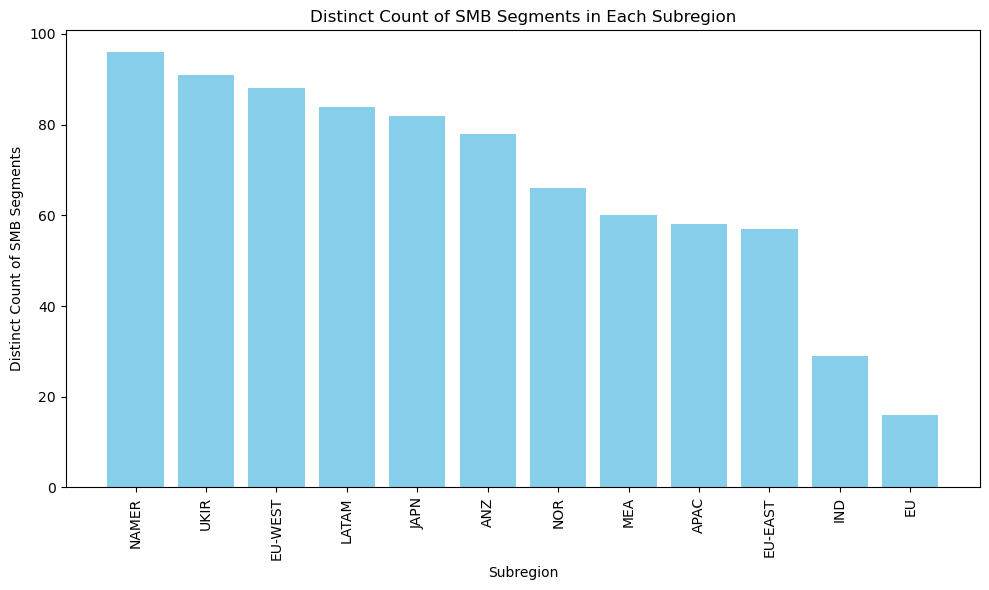

In [32]:
#Untuk mengetahui Jumlah Segment SMB di setiap sub region
smb_df = df_prep[df_prep['Segment'] == 'SMB']

# Group by subregion and count the distinct occurrences of SMB segments
subregion_smb_counts = smb_df.groupby('Subregion')['Customer'].nunique().reset_index(name='SMB_Count')

# Sort the DataFrame by SMB_Count in descending order for better visualization
subregion_smb_counts = subregion_smb_counts.sort_values(by='SMB_Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(subregion_smb_counts['Subregion'], subregion_smb_counts['SMB_Count'], color='skyblue')
plt.title('Distinct Count of SMB Segments in Each Subregion')
plt.xlabel('Subregion')
plt.ylabel('Distinct Count of SMB Segments')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

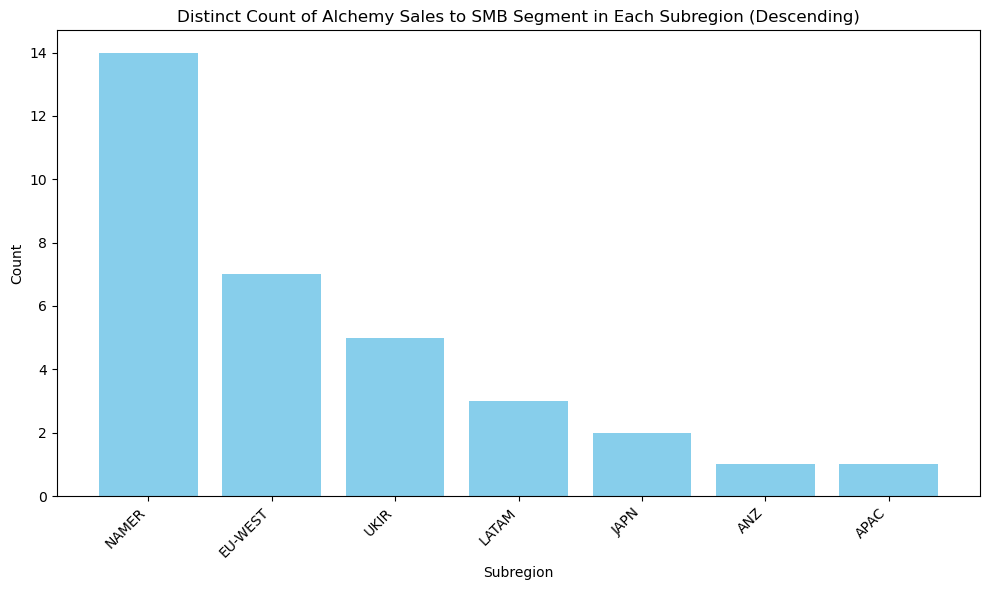

In [33]:
# Untuk mengetahui Jumlah SMB Segment yang bertransaksi di Alchemy berdasarkan sub region
alchemy_smb_df = df_prep[(df_prep['Product'] == 'Alchemy') & (df_prep['Segment'] == 'SMB')]

# Group by subregion and count the distinct occurrences
alchemy_smb_count_by_subregion = alchemy_smb_df.groupby('Subregion')['Customer'].nunique().reset_index(name='Count')

# Sort the DataFrame by the count in descending order
alchemy_smb_count_by_subregion = alchemy_smb_count_by_subregion.sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(alchemy_smb_count_by_subregion['Subregion'], alchemy_smb_count_by_subregion['Count'], color='skyblue')
plt.title('Distinct Count of Alchemy Sales to SMB Segment in Each Subregion (Descending)')
plt.xlabel('Subregion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

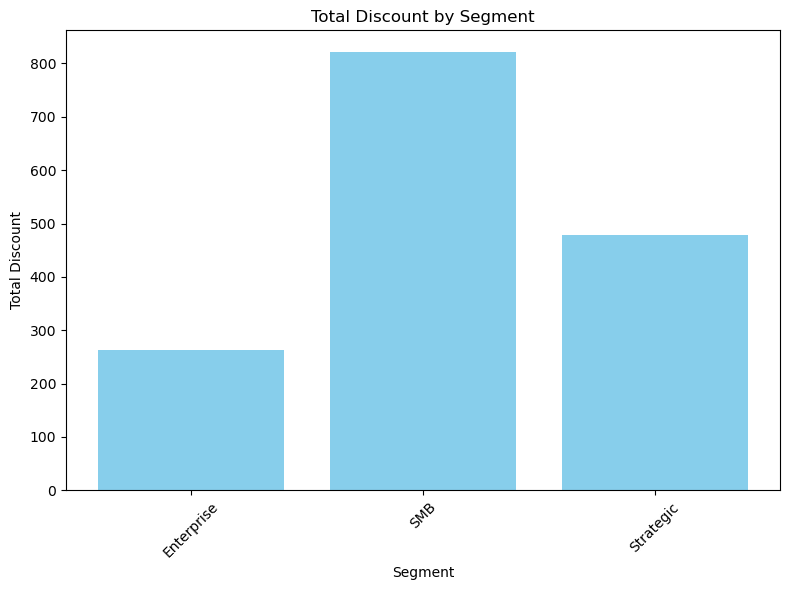

In [34]:
total_discount_by_segment = df_prep.groupby('Segment')['Discount'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(total_discount_by_segment['Segment'], total_discount_by_segment['Discount'], color='skyblue')
plt.title('Total Discount by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Discount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

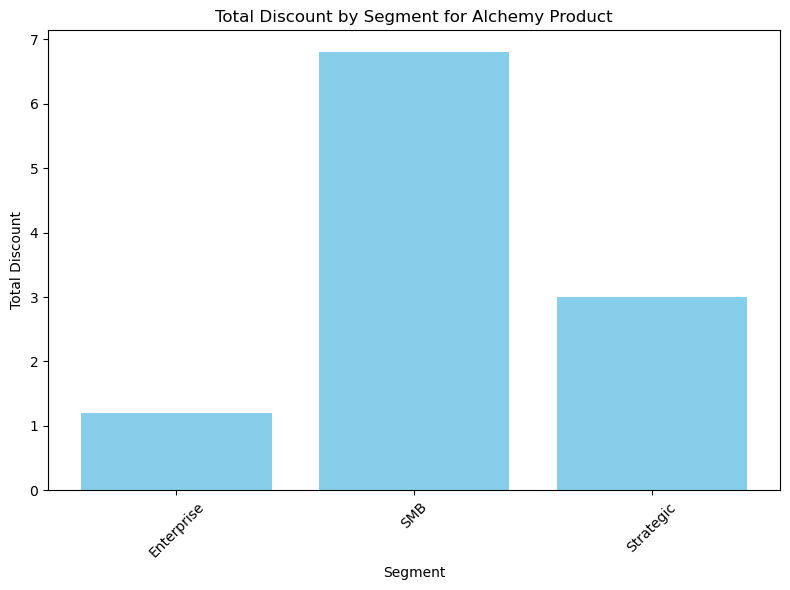

In [35]:
alchemy_df = df_prep[df_prep['Product'] == 'Alchemy']

# Group by segment and sum up the discount within each group
total_discount_by_segment_alchemy = alchemy_df.groupby('Segment')['Discount'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(total_discount_by_segment_alchemy['Segment'], total_discount_by_segment_alchemy['Discount'], color='skyblue')
plt.title('Total Discount by Segment for Alchemy Product')
plt.xlabel('Segment')
plt.ylabel('Total Discount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

      Segment  Discount
0  Enterprise  0.092308
1         SMB  0.194286
2   Strategic  0.150000


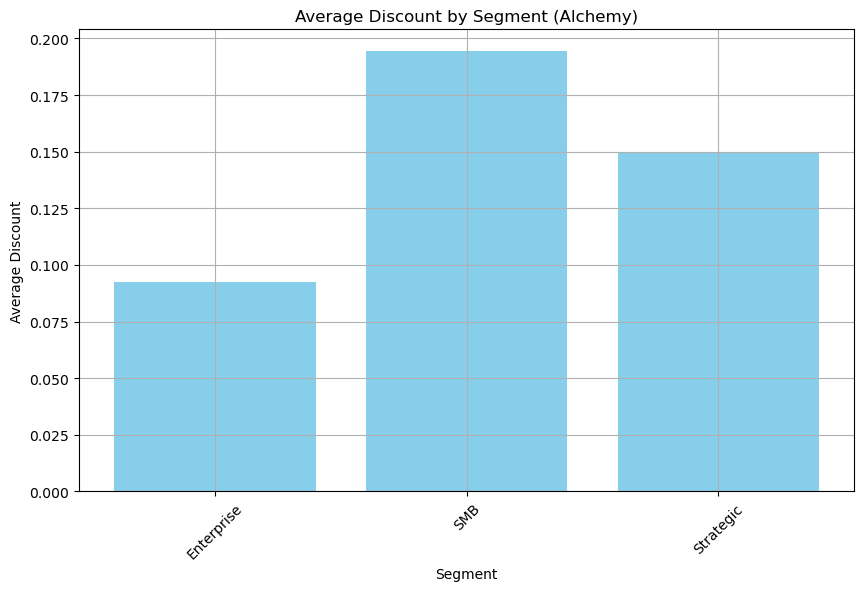

In [73]:
#Untuk mengetahui rata rata discount di product alchemy
print(average_discount_by_segment_alchemy)


plt.figure(figsize=(10, 6))
plt.bar(average_discount_by_segment_alchemy['Segment'], average_discount_by_segment_alchemy['Discount'], color='skyblue')
plt.title('Average Discount by Segment (Alchemy)')
plt.xlabel('Segment')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [37]:
average_discount_overall = df_prep['Discount'].mean()

print("Average discount for overall products:", average_discount_overall)

Average discount for overall products: 0.15620272163297977


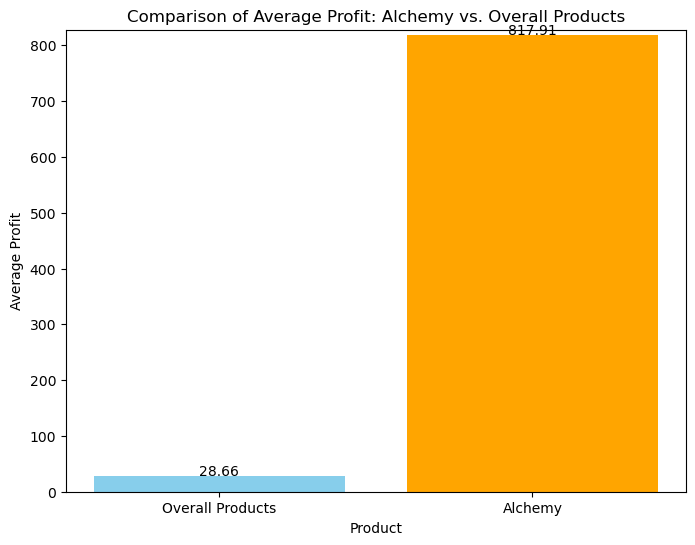

In [38]:
#Komparasi rata - rata profit antara alchemy dan product lainnya 
average_profit_overall = df_prep['Profit'].mean()

# Calculate the average profit for the "Alchemy" product
alchemy_df = df_prep[df_prep['Product'] == 'Alchemy']
average_profit_alchemy = alchemy_df['Profit'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Overall Products', 'Alchemy'], [average_profit_overall, average_profit_alchemy], color=['skyblue', 'orange'])
plt.title('Comparison of Average Profit: Alchemy vs. Overall Products')
plt.xlabel('Product')
plt.ylabel('Average Profit')
plt.text(0, average_profit_overall + 1, f'{average_profit_overall:.2f}', ha='center')
plt.text(1, average_profit_alchemy + 1, f'{average_profit_alchemy:.2f}', ha='center')
plt.ylim(0, max(average_profit_overall, average_profit_alchemy) + 10)
plt.show()

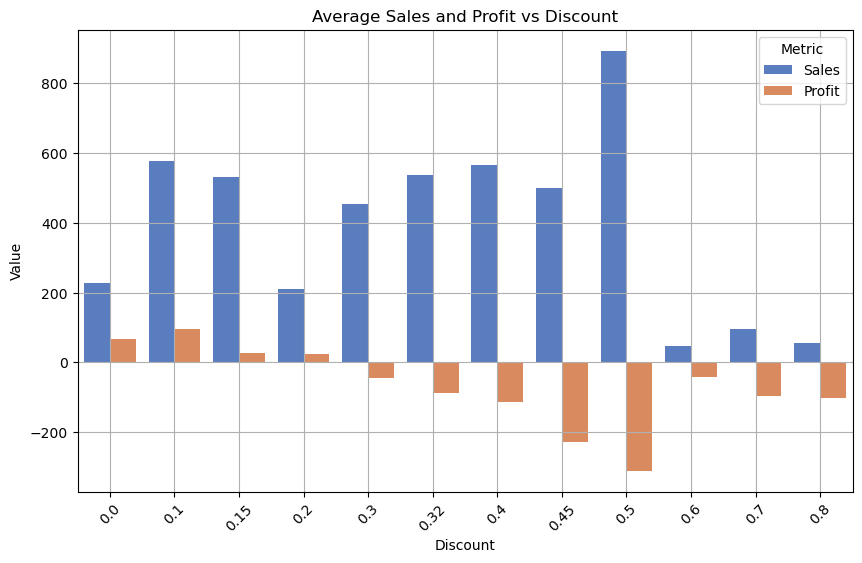

In [67]:
#Untuk mengetahui diskon yang terbaik untuk mendapatkan sales dan profit yang lebih besar
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='value', hue='variable', data=pd.melt(avg_sales_profit_by_discount, ['Discount']), palette='muted')
plt.title('Average Sales and Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Value')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Kesimpulan
1. Product Alchemy memiliki penjualan yang sedikit tetapi dapat menghasilkan profit yang terbesar dibandingkan dengan produk lainnya
2. Sebagian besar penjualan pada produk ini dihasilkan dari segment SMB, dan penjualan terbesar berasar dari north america dan penjualan hanya terbatas di 7 subregion.
3. penjualan di north america masih sangat terbatas dan penetrasinya hanya sekitar 19% dari seluruh transaksi AWS di north america, sementara segment SMB penetrasinya hanya 15%.
4. berdasarkan rata - rata diskon, diskon yang diberikan sedikit lebih besar dari rata- rata poduk yang dijual oleh AWS yaitu 19% sementara rata - rata adalah 15%, walaupun begitu produk alchemy dapat mencetak profit yang jauh lebih besar. Sementara diketahui bahwa diskon 10% memiliki rata- rata profit yang paling besar dan jumlah sales no 2 terbesar
5. hampir setengah dari penjualan produk Alchemy berasal dari segment SMB 
6. berdasarkan data diatas penggunaan diskon paling banyak dipakai oleh segment SMB, dalam hal ini dapat diartikan bahwa discount dipakai oleh target segment yang tepat

# Rekomendasi
1. Optimalisasi Penjualan Alchemy: Meskipun penjualan produk Alchemy relatif sedikit, namun memiliki profitabilitas yang tinggi. Ini menunjukkan bahwa Alchemy memiliki potensi untuk menjadi produk yang menguntungkan. Strategi pemasaran yang lebih agresif atau peningkatan fokus pada produk ini dapat membantu meningkatkan penjualan.

2. Peningkatan Penjualan di North America: Diketahui bahwa sebagian besar penjualan Alchemy berasal dari North America. Ini menunjukkan bahwa pasar ini memiliki potensi yang besar. Strategi pemasaran khusus yang ditujukan untuk meningkatkan kesadaran dan penetrasi pasar di wilayah ini dapat membantu memperluas pangsa pasar.

3. Manfaatkan Segment SMB: Diketahui bahwa sebagian besar penjualan Alchemy berasal dari segment SMB. Fokus pada segment ini dengan strategi pemasaran yang lebih cermat dan penawaran diskon yang disesuaikan dapat membantu meningkatkan loyalitas pelanggan dan meningkatkan penjualan.

4. Optimalkan Penggunaan Diskon: Meskipun diskon yang diberikan untuk produk Alchemy cenderung sedikit lebih besar dari rata-rata produk lain, namun hasil akhirnya masih menguntungkan. Perlu mempertimbangkan ulang strategi diskon untuk memastikan tetap menguntungkan secara finansial.

5. Segment SMB sebagai Target Utama Diskon: Diketahui bahwa penggunaan diskon paling banyak terjadi pada segment SMB. Hal ini menunjukkan bahwa strategi diskon lebih efektif saat ditujukan kepada segmen pelanggan yang tepat. Analisis lebih lanjut tentang preferensi dan kebiasaan belanja pelanggan dari segment ini dapat membantu dalam merancang strategi diskon yang lebih efektif.

6. Pengembangan Pasar di Amerika Selatan, Australia, dan Asia: Wilayah-wilayah ini memiliki potensi yang besar untuk pertumbuhan penjualan karena adanya sejumlah besar UMKM, khususnya di Brasil dan negara-negara di kawasan ASEAN seperti Thailand. Dengan memperluas operasi pemasaran ke wilayah ini, perusahaan dapat menjangkau lebih banyak pelanggan potensial dan meningkatkan kesadaran merek di pasar yang berkembang pesat.

# Reference 
1. https://www.statista.com/statistics/1261598/global-smes-by-region/
2. https://www.weforum.org/agenda/2021/11/here-are-the-top-countries-enjoying-the-largest-growth-in-small-businesses-and-why-that-matters/ 
